
<div>
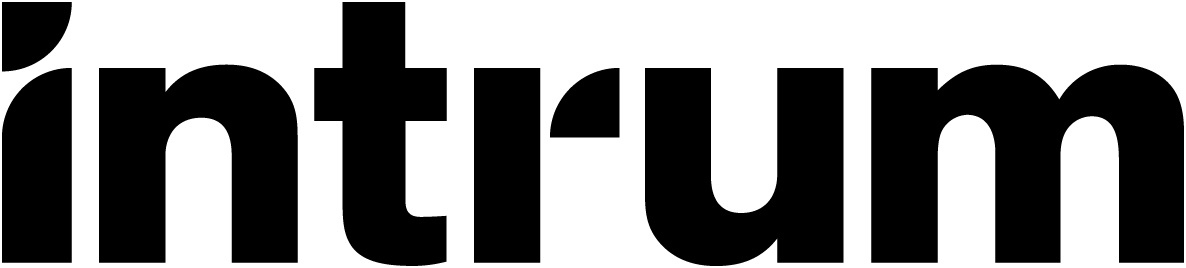
</div>

# <span style="color:#993063"> Risk Analysisis on Debt - Intrum <a name="id3"></a>

### Author: Jacky Barraza

### Notebook 1/3
    
The following report describes both my approach, method, and results to address the Intrum – Home Quiz Challenge, when exploring and preparing data for modelling. 
    
This is the first notebook where I worked on the data preparation and data exploration

#  <span style="color:#E8846F"> Setting the tools <a name="id3"></a>

### Paths

In [1]:
import os
print("My current working directory is", os.getcwd())

My current working directory is /Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/notebooks


In [2]:
config_input = '/Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/data/input/'

config_output = '/Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/data/processed/'

DATABASE = config_input + "dataset.db"
DATABASE

'/Users/jackyb/Projects/Lyon_Ds/CreditRiskPayment_JB/data/input/dataset.db'

### Libraries

In [3]:
import sqlite3
from sqlite3 import Error
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from pandas import Timestamp
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
from pandas.plotting import scatter_matrix
from collections import Counter
from scipy.stats import pearsonr
import missingno as msno
from sklearn.impute import SimpleImputer
import missingno as msno

import warnings 
pandas.set_option('display.max_columns', 1000)
pandas.set_option('display.max_rows', 1000)
warnings.filterwarnings('ignore')

### General Variables

In [4]:
#general
PERCENTILE = [.25, .50, .75]
INCLUDE = ['object', 'float', 'int']
NUMERICS = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


#palette colors
SETCOL = ["windows blue", "amber", "greyish", "faded green", "dusty purple"]
SETCOL1 = ["#6dccda", "#cdcc5d", "#a2a2a2", "#ed97ca", "#a8786e", "#ad8bc9", "#ed665d", "#67bf5c", "#ff9e4a", "#729ece"]
SETCOL2 = ["#ed665d", "#67bf5c", "#ff9e4a", "#729ece", "#ad8bc9"]
SETCOL3 = [ "#729ece", "#67bf5c", "#ff9e4a", "#ad8bc9", "#ed665d"]
SETCOL4 = [ "#6dccda", "#ed97ca", "#729ece", "#ad8bc9", "#ff9e4a"]

### Helper functions: Data info collection

In [5]:
def create_connection(path:str):
    """
    Create a connection with the database
    """
    connection = None
    try:
        connection = sqlite3.connect(path)
        print("Connection to SQLite DB successful")
    except Error as e:
        print(f"The error '{e}' occurred")

    return connection

def show_tables(con):
    """
    Show tables on the database
    """
    cursor = con.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    return (cursor.fetchall())

def get_general_information_of_the_data(df):
    """
    Expose the general information from the original dataframe
    :param df: dataframe
    :return: statistics on the dataframe
    """
    print("----------------------------------------------------------------")
    print("General statistic of the data: \n")
    return df.describe(percentiles=PERCENTILE, include='all')

def check_df_duplicates(df):
    """
    Check for duplicates in the dataset
    :param df: dataframe
    :return: dataframe with duplicate rows
    """
    print("\n----------------------------------------------------------------")
    print("Checking duplicates: \n")
    duplicateRowsDF = df[df.duplicated()]
    if len(duplicateRowsDF.index) != 0:
        print("Duplicate Rows except first occurrence based on all columns are :")
        print(duplicateRowsDF)
        print("\n")
        return duplicateRowsDF
    else:
        print("Do not exits rows duplicate in the dataset")


def columns_as_list(df):
    """
    Variables as a list by type
    :param df: dataframe
    :return: three list of variables
    """
    all_var = list(df.columns)
    print("----------------------------------------------------------------")
    print("List of all variables: \n")
    print(all_var)
    obj_var = list(df.select_dtypes(['object']).columns)
    if obj_var: 
        print("----------------------------------------------------------------")
        print("List of object variabless: \n")
        print(obj_var)
    
    num_var = list(df.select_dtypes(include=NUMERICS))
    if num_var: 
        print("----------------------------------------------------------------")
        print("List of numeric variable: \n")
        print(num_var)
    
    return all_var, obj_var, num_var 


def match_column_name(df, varcode_search:str):
    """
    Filter a dataframe by given a column
    """
    match = datasetdf.loc[datasetdf['varcode'] == varcode_search]['name'].values
    print('varcode: ', varcode_search,  ' - meaning: ', match)

### Database Connection and Dataframe Definition

In [6]:
con = create_connection(DATABASE)

Connection to SQLite DB successful


In [7]:
tables_on_database = show_tables(con)
tables_on_database

[('dataset',), ('metadata',)]

In [8]:
metadatadf = pandas.read_sql_query('SELECT * FROM dataset;', con)
datasetdf = pandas.read_sql_query('SELECT * FROM metadata;', con)

In [9]:
match_column_name(datasetdf, 'ap090')

varcode:  ap090  - meaning:  ['TargetAmount90Days']


In [10]:
datasetdf

varcode                                               name var_class  \
0    a8404  RatioOfCustomersAtAddressWithSuccessfullyClose...  variable   
1    ap090                                 TargetAmount90Days    target   
2    c0001                      OriginalCapitalOfCaseInvoices  variable   
3    c0015                                       AmountOfCase  variable   
4    c0019                                          AgeOfDebt  variable   
5    c0031                               NumberOfTelephonesCI  variable   
6    c0039                                       IndustryCode  variable   
7    c0044                                         ClientName  variable   
8    c9008                                        CustomerAge  variable   
9    ct090                                       Target90Days    target   
10   b0007           AmountOfCustomerPaymentsOnAllCasesBlevel  variable   
11   d0009                          AmountOfCustomerOpenCases  variable   
12   d0012                  LastOriginalClosingCodeOfCustomer  variable   
13   d0027               NumberOfCustomerIncomingCallDatesTee  variable   
14   d1205      NumberOfSuccessfullyClosedCasesInLast24Months  variable   
15   d2112             NumberOfCustomerPaymentsInLast12Months  variable   
16   d0031  NumberOfUnsuccessfullyClosedCustomerCasesLast3...  variable   

   entity_table  
0       address  
1          case  
2          case  
3          case  
4          case  
5          case  
6          case  
7          case  
8          case  
9          case  
10       debtor  
11    debtor_oc  
12    debtor_oc  
13    debtor_oc  
14    debtor_oc  
15    debtor_oc  
16    debtor_oc

In [11]:
metadatadf.head(5)

case_id                keydate  ct090  ap090   c0001  c0039 c0044  d0031  \
0        1  2017-08-12 00:00:00.0    0.0    0.0  221.68  K6622     1    2.0   
1        2  2017-02-03 00:00:00.0    0.0    0.0  151.36  K6512     2    NaN   
2        3  2017-02-17 00:00:00.0    0.0    0.0   48.84  K6512     3    1.0   
3        4  2017-09-18 00:00:00.0    0.0    0.0  413.15  K6622     4    NaN   
4        5  2017-07-22 00:00:00.0    0.0    0.0  125.83  K6512     5    2.0   

    b0007   d0009  c0031  a8404  c0019  d0027  c9008  d2112 d0012  d1205  \
0    0.00  238.38    2.0    NaN   98.0    0.0   49.0    0.0     1    NaN   
1  210.53    0.00    5.0    NaN  109.0    2.0   51.0    0.0     2    1.0   
2     NaN    0.00    2.0    0.0  748.0    0.0   48.0    NaN     3    NaN   
3     NaN   54.14    3.0    1.0    8.0    0.0   27.0    NaN     4    NaN   
4   20.00   83.00    6.0    NaN  324.0    0.0   40.0    0.0     1    NaN   

    c0015  
0  222.69  
1  212.72  
2   56.84  
3  463.15  
4  146.09

#  <span style="color:#E8846F"> Data at a glances <a name="id3"></a>

In [12]:
get_general_information_of_the_data(metadatadf)

----------------------------------------------------------------
General statistic of the data: 



case_id                keydate         ct090         ap090  \
count   30000.000000                  30000  30000.000000  30000.000000   
unique           NaN                    189           NaN           NaN   
top              NaN  2017-02-23 00:00:00.0           NaN           NaN   
freq             NaN                   1184           NaN           NaN   
mean    15000.500000                    NaN      0.168733     49.215836   
std      8660.398374                    NaN      0.374522    240.063401   
min         1.000000                    NaN      0.000000      0.000000   
25%      7500.750000                    NaN      0.000000      0.000000   
50%     15000.500000                    NaN      0.000000      0.000000   
75%     22500.250000                    NaN      0.000000      0.000000   
max     30000.000000                    NaN      1.000000  25000.000000   

               c0001  c0039  c0044         d0031         b0007          d0009  \
count   29975.000000  30000  30000  17371.000000  13074.000000   30000.000000   
unique           NaN      8    181           NaN           NaN            NaN   
top              NaN  K6512      6           NaN           NaN            NaN   
freq             NaN  17329   3126           NaN           NaN            NaN   
mean      538.590694    NaN    NaN      1.634391    423.156043     555.063823   
std      1248.533877    NaN    NaN      1.318419    902.166491    1939.588574   
min         0.000000    NaN    NaN      0.000000      0.000000    -319.010000   
25%       145.100000    NaN    NaN      1.000000     76.000000       0.000000   
50%       298.720000    NaN    NaN      1.000000    202.715000       0.000000   
75%       638.645000    NaN    NaN      2.000000    500.677500     481.322500   
max     84561.840000    NaN    NaN     15.000000  53982.610000  110158.640000   

               c0031         a8404         c0019         d0027         c9008  \
count   30000.000000  19599.000000  30000.000000  30000.000000  27016.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        3.092900      0.283395    104.948833      0.473067     42.339466   
std         2.151021      0.312366    196.864753      1.397094     13.215883   
min         0.000000      0.000000      3.000000      0.000000      6.000000   
25%         2.000000      0.000000     10.000000      0.000000     32.000000   
50%         3.000000      0.210000     77.000000      0.000000     41.000000   
75%         4.000000      0.450000    126.000000      0.000000     51.000000   
max        35.000000      1.000000   6193.000000     40.000000    117.000000   

               d2112  d0012        d1205         c0015  
count   13048.000000  30000  8762.000000  30000.000000  
unique           NaN    102          NaN           NaN  
top              NaN      1          NaN           NaN  
freq             NaN  11507          NaN           NaN  
mean        0.935622    NaN     0.897170    605.535361  
std         1.755761    NaN     0.814515   1223.783876  
min         0.000000    NaN     0.000000      9.750000  
25%         0.000000    NaN     0.000000    185.410000  
50%         0.000000    NaN     1.000000    355.650000  
75%         1.000000    NaN     1.000000    725.480000  
max        24.000000    NaN    15.000000  84561.840000

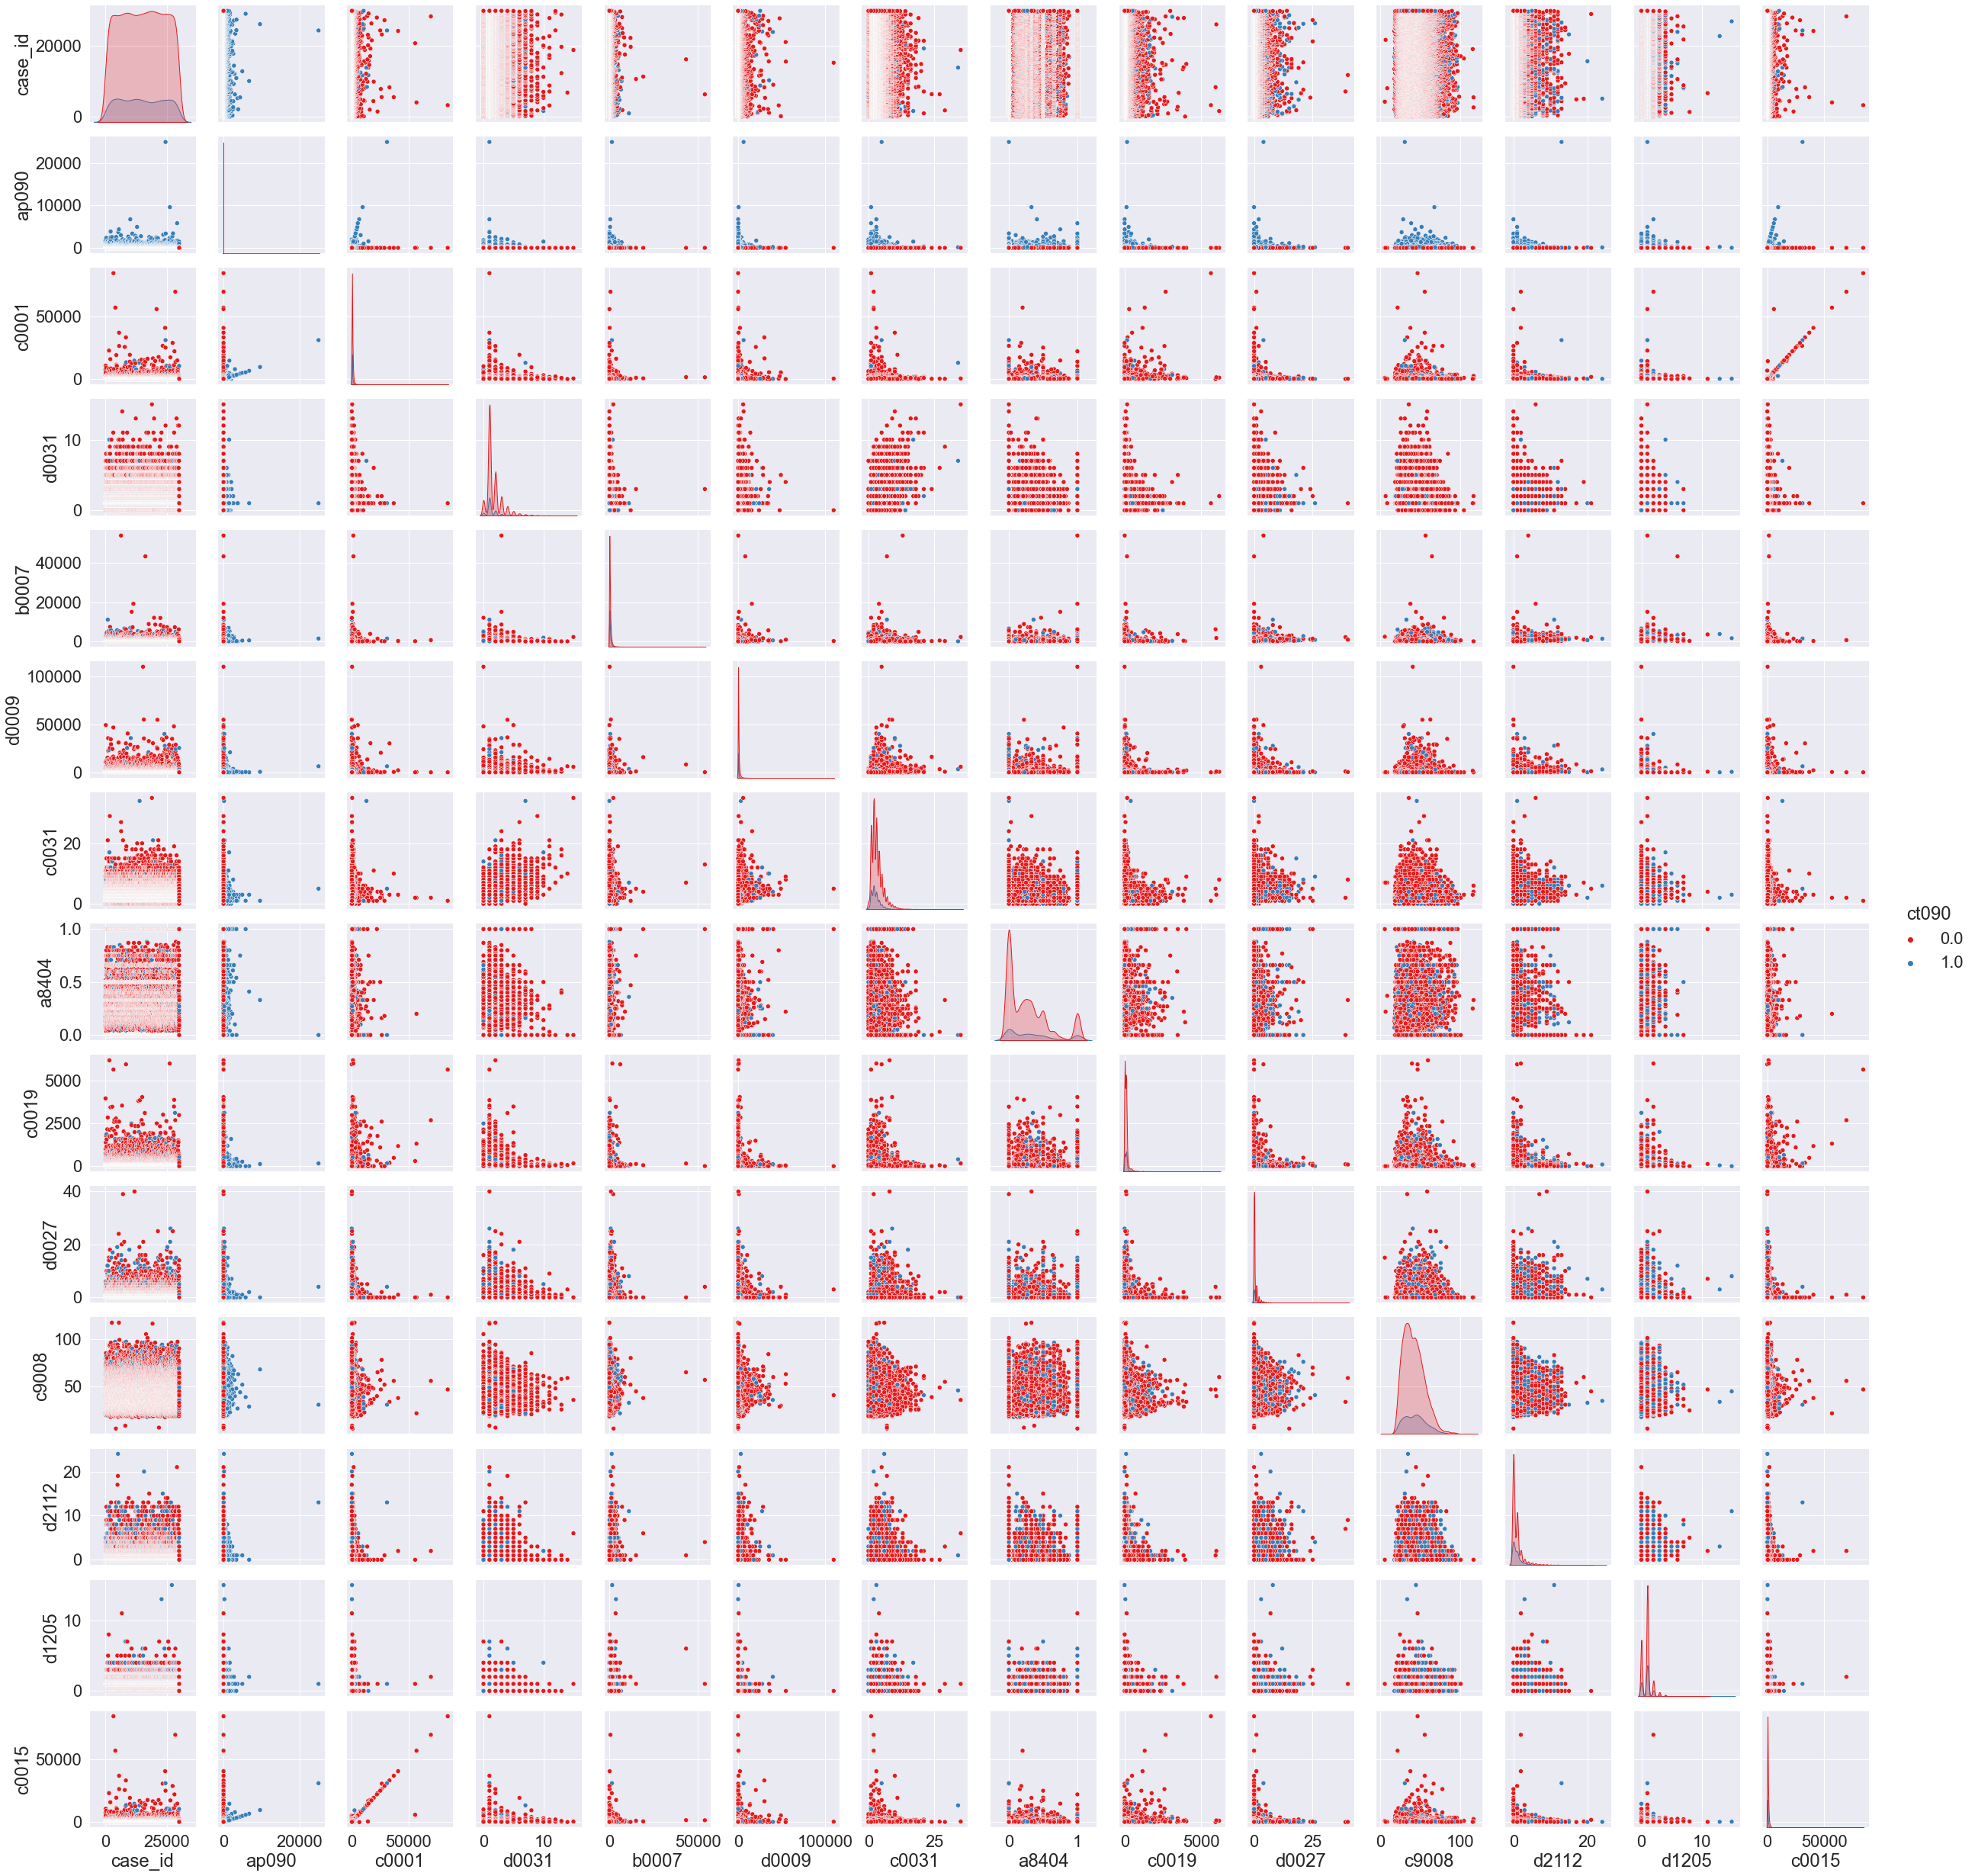

In [13]:
sns.set(font_scale=2)
sns.pairplot(metadatadf, hue='ct090', palette = 'Set1') 

> The first look at the data shows NaN values, a few categorical variables, outlayers, some variables that are hight correlated. 
>
>It will be tackle down some of this conditions to prepare the data for modelling.

### Fixed datatype for some variables

In [14]:
metadatadf['kdate_ori'] = pandas.to_datetime(metadatadf['keydate'])
metadatadf['kdate'] = metadatadf['kdate_ori'].map(Timestamp.date)
metadatadf['kdate'] = pandas.to_datetime(metadatadf['kdate'])
metadatadf['month'] = metadatadf['kdate'].dt.month

print (metadatadf['kdate'].min())
print (metadatadf['kdate'].max())

2017-01-01 00:00:00
2017-09-30 00:00:00


> Observations:
>
> I am aware that this input it is not the precise date on the register of the sample point, either the payment day, but give a estimation on period + 90days on when the debt was pay or not pay, from the event tracked on the case. 
> I will give a try it to this variable because as human beings we have some "patterns", I mean, it is possible that someone pay in months where the general spences are low. This hypothesis will depend on the country. For example, USA or Canada are pretty defined by increasing family expenses on Hallowing. If debtor are "retails" it might have an inpact on the result on the result of debt collection. Also, the strategy could consider this points.

In [15]:
metadatadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   case_id    30000 non-null  int64         
 1   keydate    30000 non-null  object        
 2   ct090      30000 non-null  float64       
 3   ap090      30000 non-null  float64       
 4   c0001      29975 non-null  float64       
 5   c0039      30000 non-null  object        
 6   c0044      30000 non-null  object        
 7   d0031      17371 non-null  float64       
 8   b0007      13074 non-null  float64       
 9   d0009      30000 non-null  float64       
 10  c0031      30000 non-null  float64       
 11  a8404      19599 non-null  float64       
 12  c0019      30000 non-null  float64       
 13  d0027      30000 non-null  float64       
 14  c9008      27016 non-null  float64       
 15  d2112      13048 non-null  float64       
 16  d0012      30000 non-null  object       

In [16]:
all_var_metadf, obj_var_metadf, num_var_metadf  = columns_as_list(metadatadf)

----------------------------------------------------------------
List of all variables: 

['case_id', 'keydate', 'ct090', 'ap090', 'c0001', 'c0039', 'c0044', 'd0031', 'b0007', 'd0009', 'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'd0012', 'd1205', 'c0015', 'kdate_ori', 'kdate', 'month']
----------------------------------------------------------------
List of object variabless: 

['keydate', 'c0039', 'c0044', 'd0012']
----------------------------------------------------------------
List of numeric variable: 

['case_id', 'ct090', 'ap090', 'c0001', 'd0031', 'b0007', 'd0009', 'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'd1205', 'c0015', 'month']


Text(0, 0.5, 'Data type')

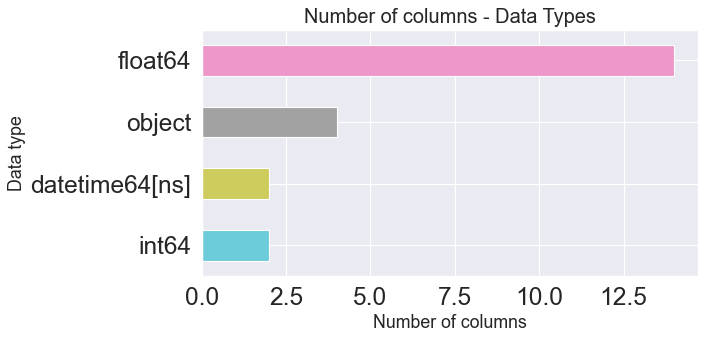

In [17]:
# Number of each type of column
plt.figure(figsize=(8, 4), dpi=80)
metadatadf.dtypes.value_counts().sort_values().plot(kind='barh', color=['#6dccda', '#cdcc5d', '#a2a2a2','#ed97ca' ])
plt.title('Number of columns - Data Types',fontsize=18)
plt.xlabel('Number of columns',fontsize=16)
plt.ylabel('Data type',fontsize=16)

##  <span style="color:#E8846F"> Null Values Inspection  <a name="id3"></a>

> A way to check the nulls values is defining a function to count it and to extract a dataframe the variables with a higher proportion of null values, then we can have a better idea of the magnitud of NaN on the dataset.

### Helper functions: Knowing the null data points

In [18]:
def counting_nullval (df):
    nanval_perct = ((100 * df.isnull().sum()) / len(df))
    nanval = df.isnull().sum()
    
    #creating a table 
    
    nanvaltable = pandas.concat([nanval,nanval_perct], axis =1)
    nanvaltable = nanvaltable.rename(columns = \
                        {0 : 'Sum_MissingValues', 1 : 'Perc_MissingValues'  })
   
    #Now that we got a table with this information, 
    #I am going to proceed to extract only the variables with null values
    
    filtered_null_data = nanvaltable[nanvaltable.Perc_MissingValues != 0].sort_values(\
                                                        'Perc_MissingValues', ascending=False).round({'Perc_MissingValues':3})
    
    return filtered_null_data


In [19]:
missing_values = counting_nullval(metadatadf)

missing_values.style.background_gradient(cmap='Reds')

<AxesSubplot:>

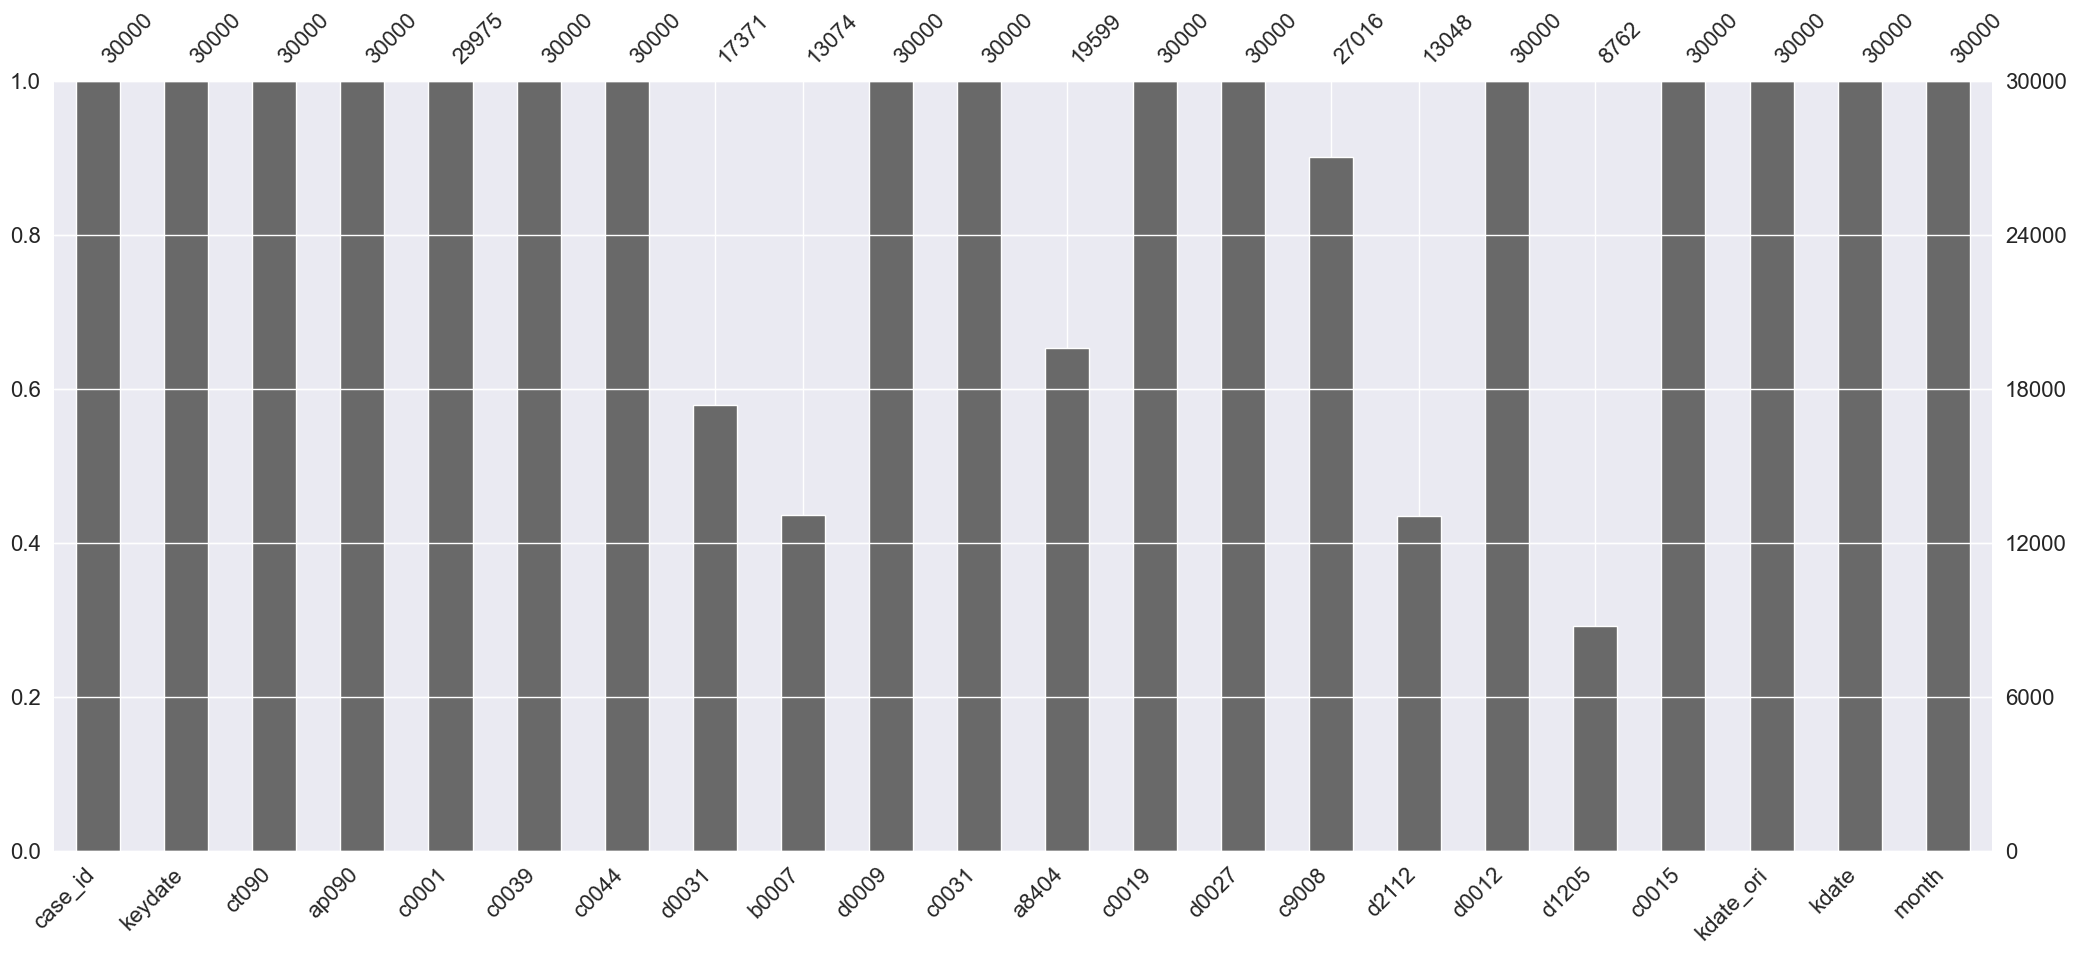

In [20]:
msno.bar(metadatadf)

<AxesSubplot:>

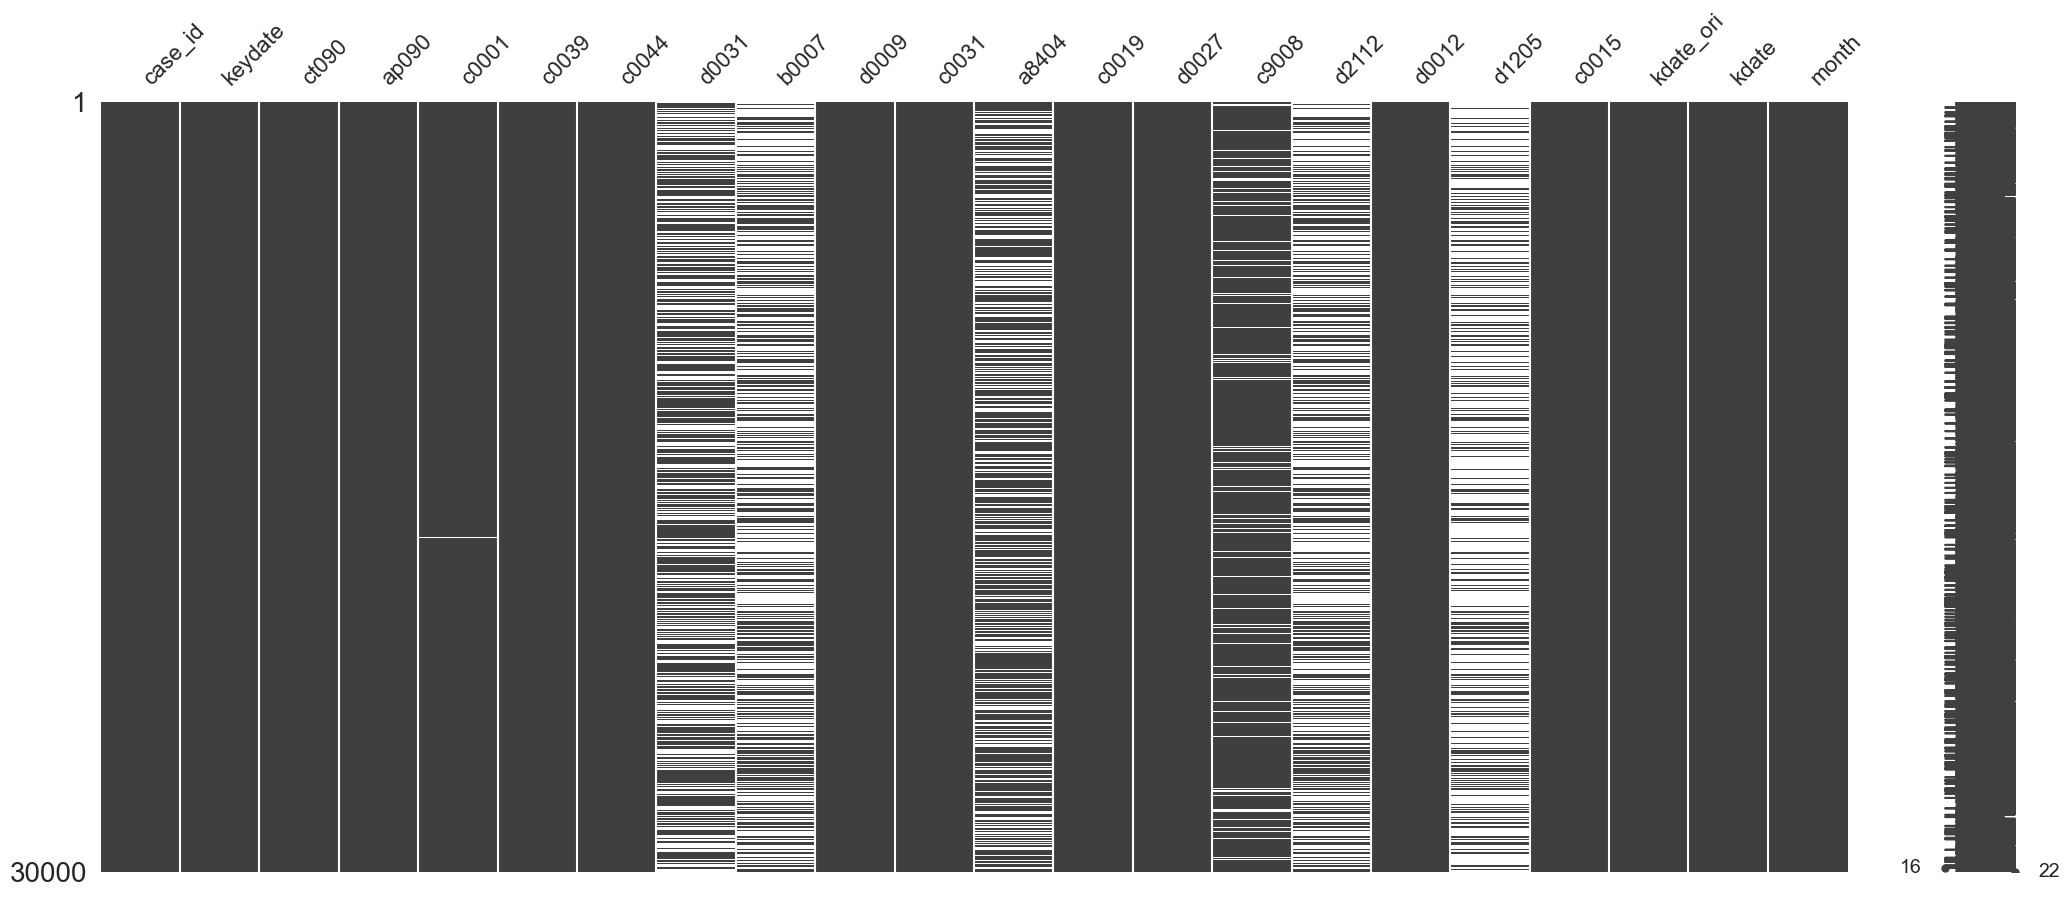

In [21]:
msno.matrix(metadatadf)

<AxesSubplot:>

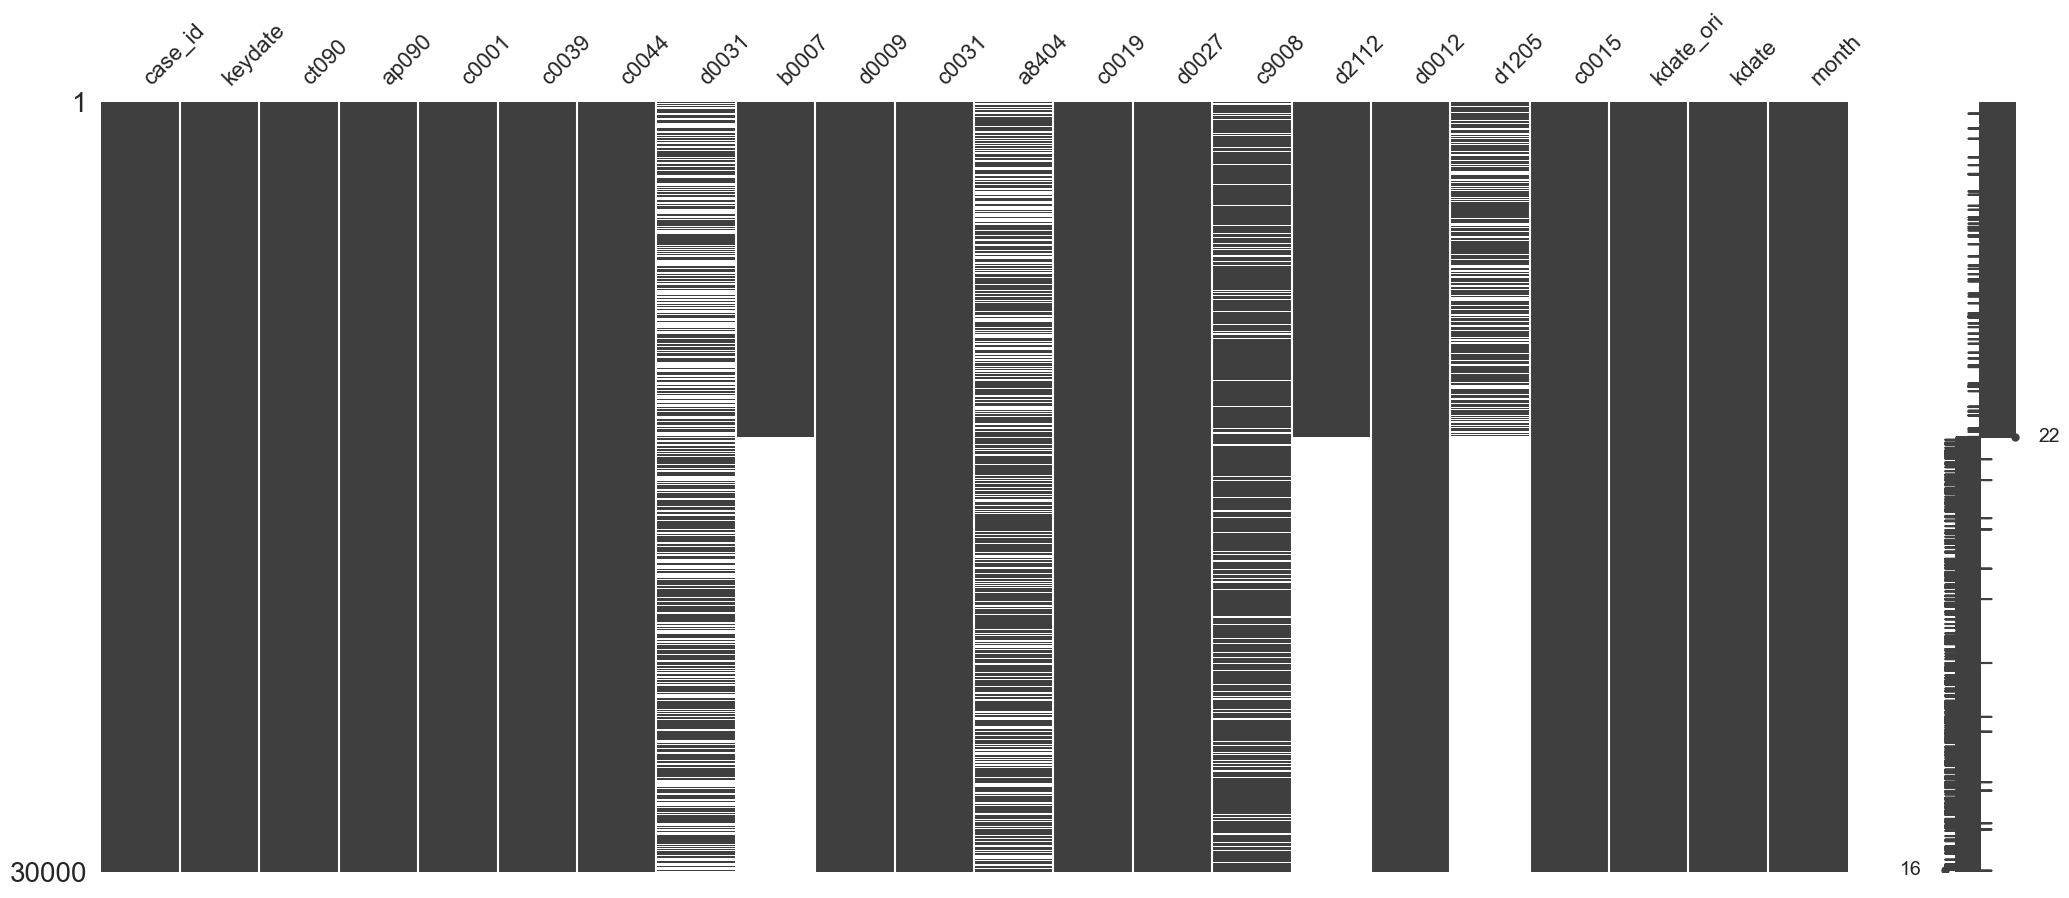

In [22]:
sorted = metadatadf.sort_values('d2112')
msno.matrix(sorted)

> Observations:
>
> The variables with a NaN values higher than 60% will be drop of the dataset, any manipulation on this variables can add bias to the model.
> Variables b007, d2112 and d1205 might be related due to the high correlation on the number of missing values. 

> Actions:
>
> A data visualitation will be performance to find the posibles issues on data that can affect the models.
> The decisions on how to handle NaN or how to deal with outalyer, will be take depending on the variable.


##  <span style="color:#729ece"> Data Cleaning - Base on Data Quality  <a name="id3"></a>



In [23]:
df_c = metadatadf.copy()

In [24]:
def displot_with_stats(df,col,color):
    """build a histogram and check distribution"""
    sns.set_palette(SETCOL1)
    sns.set(font_scale=1.3)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.set_style('whitegrid')
    sns.distplot(df[col], bins=150, kde=False, color= color)      
    plt.show()

    print(f"Valores únicos: {df[col].describe(percentiles = PERCENTILE, include = INCLUDE)}")
    print(f"Número de nulos: {df[col].isna().sum()}")
    print(f"Porcentaje de nulos: {round((((df[col].isna().sum())/df[col].size)*100), 2)}")

def box_plot_visual (df, col_x, col_y):
    sns.set_style("darkgrid")
    fig, ax = plt.subplots(figsize=(8,4))
    sns.set(font_scale=1.5)
    box_plot = sns.boxplot(x = col_x,  y = col_y, data=df, palette=SETCOL1)
    
def box_plot_visual_list (df, list_col):
    for i, col in enumerate(list_col):
        sns.set_style("darkgrid")
        fig, ax = plt.subplots(figsize=(8,4))
        sns.set(font_scale=1.5)
        box_plot = sns.boxplot(x = 'month',  y = col, data=df, palette=SETCOL1)


In [25]:
print ('********** Summary Nulls values **********')
print('\n')

print ("The raw data load has " + str(metadatadf.shape[1]) + " columns.\n"      
            "There are " + str(missing_values.shape[0]) +
              " columns that have missing values. ")
print('\n')
nulls_gt75 = missing_values[missing_values.Perc_MissingValues >= 60]
print ("The number of columns with more that 60% of null values are: " + str(nulls_gt75["Perc_MissingValues"].count()) )


********** Summary Nulls values **********


The raw data load has 22 columns.
There are 7 columns that have missing values. 


The number of columns with more that 60% of null values are: 1


> The Strategy

>I am going to drop those columns with more than 60% of nulls values as I mentioned above. The reasons:
>
>a) In this case I am going to follow the 60/40 relation. Above 60% of missing data any modification doing on the data to fill those nulls values might add bias in the variable
>
>b) On the other hand, columns with nulls values above 60% is only one, and considering the amount of variables / analysis time / no input on the whole understanding of the data, I am going to proceed to drop those mentioned.

In [26]:
df_c.drop(['d1205'], axis=1, inplace = True)


###  <span style="color:#E8846F"> Categorical variables - Inspection <a name="id3"></a>

In [27]:
datasetdf[datasetdf['varcode'].isin(obj_var_metadf)]

varcode                               name var_class entity_table
6    c0039                       IndustryCode  variable         case
7    c0044                         ClientName  variable         case
12   d0012  LastOriginalClosingCodeOfCustomer  variable    debtor_oc

### Helper functions: Barplot showing labels

In [28]:
def barplot_labels(df, col, most_common, plot_name):
    sns.set_style('whitegrid')
    sns.set_palette(SETCOL1)
    sns.set(font_scale=1.3)
    plt.figure(figsize=(10, 7), dpi=80)
    tc = Counter(df[col].tolist()).most_common(most_common)
    tc_index = [table[0] for table in tc]
    tc_values = [table[1] for table in tc]

    ax = sns.barplot(x = tc_values , y = tc_index,  orient = 'h')
    ax.bar_label(ax.containers[0])
    plt.title(plot_name)
    plt.xlabel('Counter')
    plt.ylabel(plot_name)

In [29]:
object_data = pandas.DataFrame(df_c.select_dtypes('object').apply(pandas.Series.nunique, axis = 0))
object_data = object_data.rename(columns = {0 : 'Sum_Objtype'})
#object_data 
Obj_data_sort = object_data.sort_values('Sum_Objtype', ascending=False)
Obj_data_sort.head(7)

Sum_Objtype
keydate          189
c0044            181
d0012            102
c0039              8

>Observation:
>
> Those categorical variables on the dataset are tricky. I mean, the really only variable that cointain strings is c0039. However, the other variables define a category with "int" numbers. 
> As I don't know the origen of the data, I am asuming this data has some transformation as was describe on the desciption of the challange. Therefore, I will keep those variables as they are.  


####  <span style="color:#67bf5c"> Variable: Industry code - c0039 <a name="id3"></a>
 

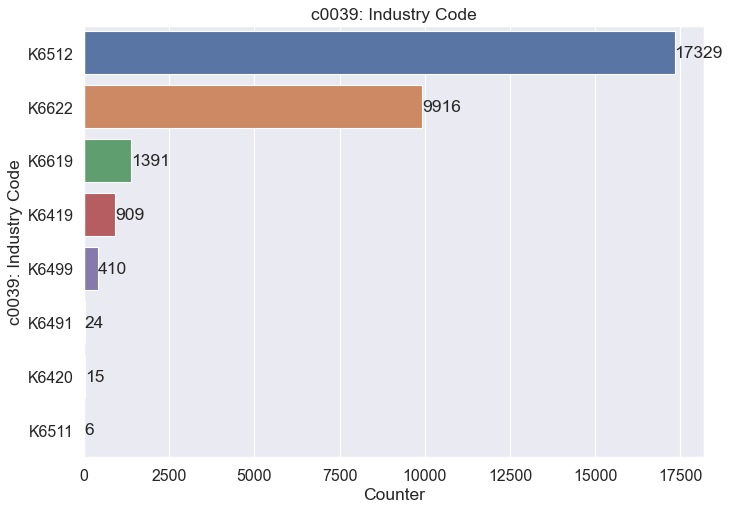

In [30]:
barplot_labels(df_c, 'c0039', 8, 'c0039: Industry Code')

> Observation:
> As the category K6491, K6420, and K6511 are less 0.1% of the total dataset, I decided to group them to reduce the variable categorical to 6 category for the model. 

In [31]:
def c0039_regroup (a):
    if a == 'K6511':
        return  'K_others'
    elif a == 'K6420':
        return 'K_others'
    elif a == 'K6491':
        return 'K_others'
    elif a == 'K6511':
        return 'K_others'
    else:
        return a

In [32]:
df_c['c0039'] = df_c['c0039'].apply(c0039_regroup)

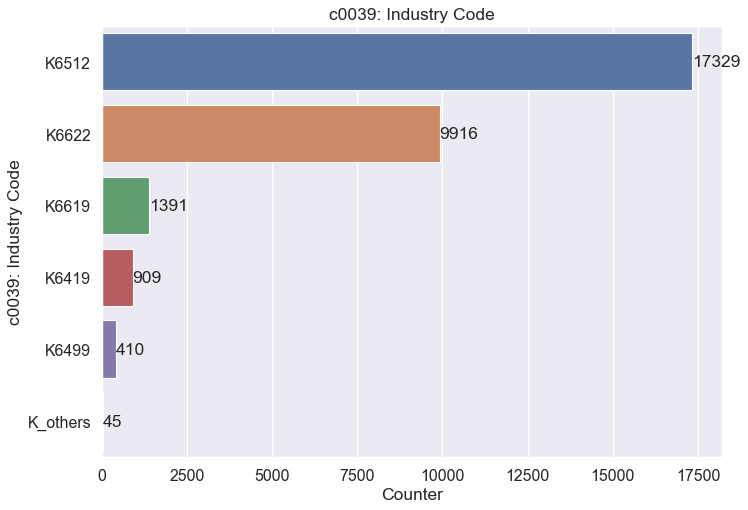

In [33]:
barplot_labels(df_c, 'c0039', 8, 'c0039: Industry Code')

####  <span style="color:#67bf5c"> Variable: Last Original Closing Code Of Customer - d0012 <a name="id3"></a>
 

In [34]:
df_c.d0012.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102'], dtype=object)

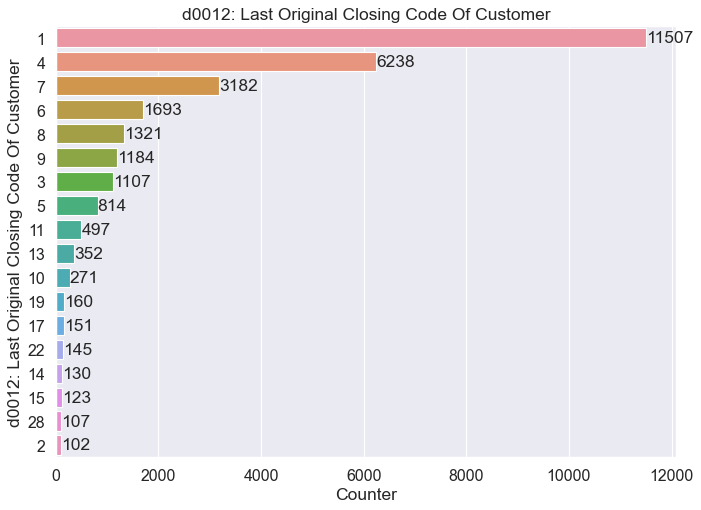

In [35]:
barplot_labels(df_c, 'd0012', 18, 'd0012: Last Original Closing Code Of Customer')


####  <span style="color:#67bf5c"> Variable: Client Name - c0044 <a name="id3"></a>

In [36]:
df_c.c0044.unique()

array(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
       '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34',
       '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56',
       '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67',
       '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78',
       '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89',
       '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100',
       '101', '102', '103', '104', '105', '106', '107', '108', '109',
       '110', '111', '112', '113', '114', '115', '116', '117', '118',
       '119', '120', '121', '122', '123', '124', '125', '126', '127',
       '128', '129', '130', '131', '132', '133', '134', '135', '136',
       '137', '138', '139', '140', '141', '142', '143', '144', '1

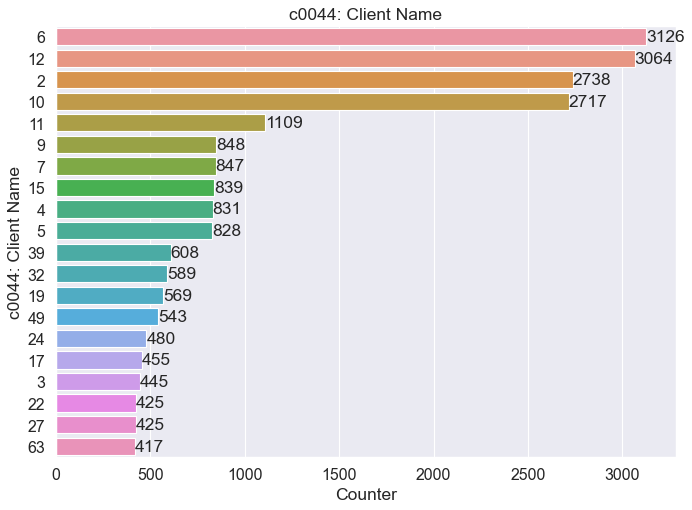

In [37]:
barplot_labels(df_c, 'c0044', 20, 'c0044: Client Name')

> Observations:
>
> Regarding the "Client Name" variable, it is showing five clients that got more data sampling. Don't know the reason. 
>
> The variable "Last Original Closing Code Of Customer", it is not clear on meaning, however it is clear the dominance of the category 4, 1 and 7. 

###  <span style="color:#E8846F"> Numerical variables - Inspection<a name="id3"></a>

In [38]:
datasetdf[datasetdf['varcode'].isin(num_var_metadf)]

varcode                                               name var_class  \
0    a8404  RatioOfCustomersAtAddressWithSuccessfullyClose...  variable   
1    ap090                                 TargetAmount90Days    target   
2    c0001                      OriginalCapitalOfCaseInvoices  variable   
3    c0015                                       AmountOfCase  variable   
4    c0019                                          AgeOfDebt  variable   
5    c0031                               NumberOfTelephonesCI  variable   
8    c9008                                        CustomerAge  variable   
9    ct090                                       Target90Days    target   
10   b0007           AmountOfCustomerPaymentsOnAllCasesBlevel  variable   
11   d0009                          AmountOfCustomerOpenCases  variable   
13   d0027               NumberOfCustomerIncomingCallDatesTee  variable   
14   d1205      NumberOfSuccessfullyClosedCasesInLast24Months  variable   
15   d2112             NumberOfCustomerPaymentsInLast12Months  variable   
16   d0031  NumberOfUnsuccessfullyClosedCustomerCasesLast3...  variable   

   entity_table  
0       address  
1          case  
2          case  
3          case  
4          case  
5          case  
8          case  
9          case  
10       debtor  
11    debtor_oc  
13    debtor_oc  
14    debtor_oc  
15    debtor_oc  
16    debtor_oc

In [39]:
missing_values.style.background_gradient(cmap='Reds')

####  <span style="color:#67bf5c"> Variable: Original Capital Of Case Invoices - c0001 <a name="id3"></a>

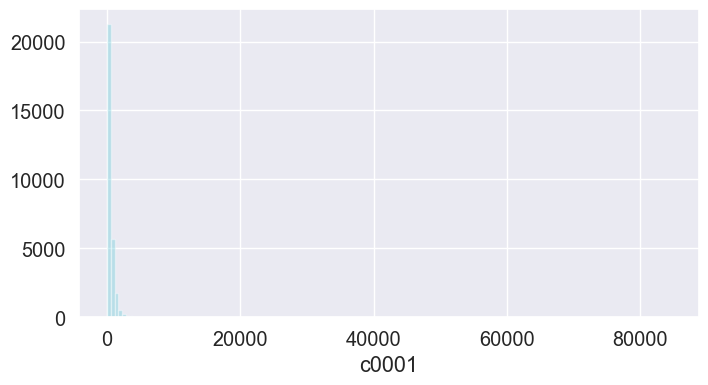

Valores únicos: count    29975.000000
mean       538.590694
std       1248.533877
min          0.000000
25%        145.100000
50%        298.720000
75%        638.645000
max      84561.840000
Name: c0001, dtype: float64
Número de nulos: 25
Porcentaje de nulos: 0.08


In [40]:
displot_with_stats(df_c, 'c0001', "#6dccda" )

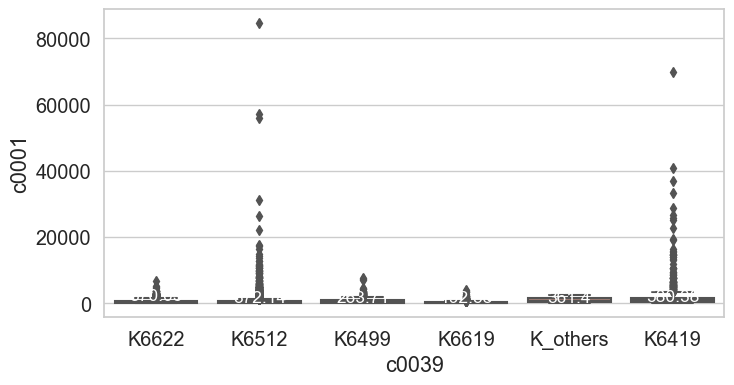

In [41]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set(font_scale=1.5)
box_plot = sns.boxplot(x = 'c0039', y = 'c0001', data = df_c, palette=SETCOL1)

medians = round(df_c.groupby(['c0039'])['c0001'].median(),2)
vertical_offset =  round(df_c['c0001'].median() * 0.05, 2)# offset from median for display


for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians.iloc[xtick] + vertical_offset,medians.iloc[xtick], 
    horizontalalignment = 'center', size = 'x-small', color='w')#, weight = 'semibold')

> Observations: 
>
> The variable presents outlayer that will be trim.
>
> The NaN will be inpute base on the mean by category on the variable c0039.

In [42]:
#keep data samples only < 50
df_c['c0001'].values[df_c['c0001'] >= 48000] = 48000

In [43]:
def impute_c0001_by_c0039(cols):
    c0001 = cols[0]
    c0039 = cols[1]

    if pandas.isnull(c0001):
        if c0039 == 'K6622':
            return round(df_c[df_c['c0039'] == 'K6622']['c0001'].mean(),2)
        elif c0039 == 'K6512':
            return round(df_c[df_c['c0039'] == 'K6512']['c0001'].mean(),2)
        elif c0039 == 'K6499':
            return round(df_c[df_c['c0039'] == 'K6499']['c0001'].mean(),2)
        elif c0039 == 'K6619':
            return round(df_c[df_c['c0039'] == 'K6619']['c0001'].mean(),2)
        elif c0039 == 'K6419':
            return round(df_c[df_c['c0039'] == 'K6419']['c0001'].mean(),2)
        elif c0039 == 'K_others':
            return round(df_c[df_c['c0039'] == 'K_others']['c0001'].mean(),2)
    else:
        return c0001

In [44]:
df_c['c0001'] = df_c[['c0001','c0039']].apply(impute_c0001_by_c0039,axis=1)
df_c['c0001'].isnull().sum()

0

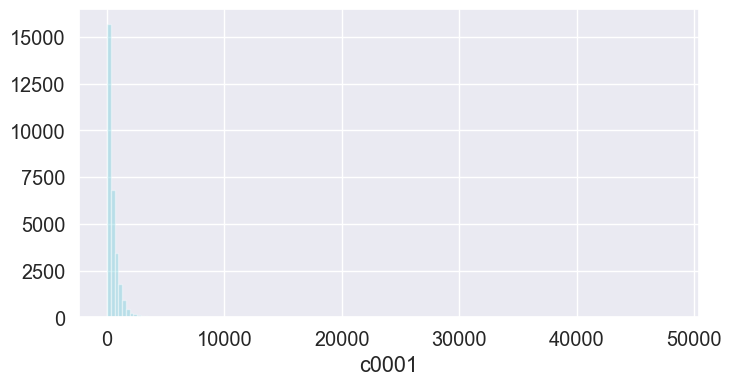

Valores únicos: count    30000.000000
mean       536.047230
std       1119.985496
min          0.000000
25%        145.157500
50%        299.020000
75%        638.015000
max      48000.000000
Name: c0001, dtype: float64
Número de nulos: 0
Porcentaje de nulos: 0.0


In [45]:
displot_with_stats(df_c, 'c0001', "#6dccda" )

####  <span style="color:#67bf5c"> Variable: Ratio Of Customers At Address With Successfully Close - a8404 <a name="id3"></a>

In [46]:
df_c['a8404'].isnull().sum()

10401

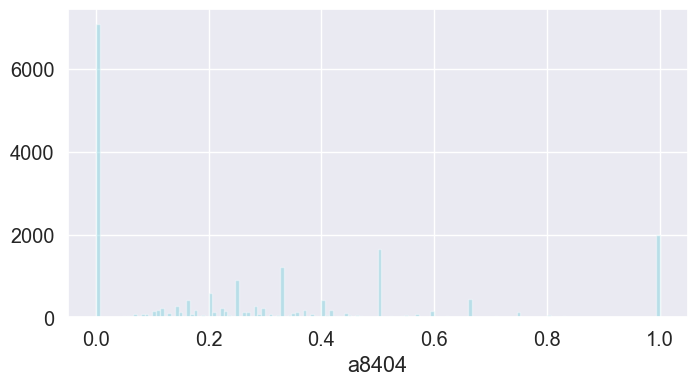

Valores únicos: count    19599.000000
mean         0.283395
std          0.312366
min          0.000000
25%          0.000000
50%          0.210000
75%          0.450000
max          1.000000
Name: a8404, dtype: float64
Número de nulos: 10401
Porcentaje de nulos: 34.67


In [47]:
displot_with_stats(df_c, 'a8404', "#6dccda" )

> Observations: 
>
> The NaN will be inpute base on the mean by category on the variable c0039.
    

In [48]:
def impute_a8404_by_c0039(cols):
    a8404 = cols[0]
    c0039 = cols[1]

    if pandas.isnull(a8404):
        if c0039 == 'K6622':
            return 0.18
        elif c0039 == 'K6512':
            return 0.25
        elif c0039 == 'K6499':
            return 0.22
        elif c0039 == 'K6619':
            return 0.24
        elif c0039 == 'K_others':
            return 0.2
        elif c0039 == 'K6419':
            return 0.3
    else:
        return a8404

In [49]:
df_c['a8404'] = df_c[['a8404','c0039']].apply(impute_a8404_by_c0039,axis=1)
df_c['a8404'].isnull().sum()

0

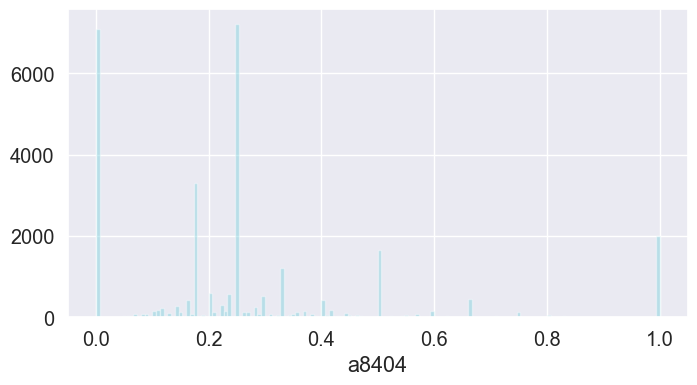

Valores únicos: count    30000.000000
mean         0.264746
std          0.254554
min          0.000000
25%          0.100000
50%          0.250000
75%          0.320000
max          1.000000
Name: a8404, dtype: float64
Número de nulos: 0
Porcentaje de nulos: 0.0


In [50]:
displot_with_stats(df_c, 'a8404', "#6dccda" )

####  <span style="color:#67bf5c"> Variable: Number Of Unsuccessfully Closed Customer Cases Last 3 - d0031 <a name="id3"></a>

In [51]:
dfindex = df_c.set_index('kdate')

In [52]:
dfindex.head(4)

case_id                keydate  ct090  ap090   c0001  c0039 c0044  \
kdate                                                                           
2017-08-12        1  2017-08-12 00:00:00.0    0.0    0.0  221.68  K6622     1   
2017-02-03        2  2017-02-03 00:00:00.0    0.0    0.0  151.36  K6512     2   
2017-02-17        3  2017-02-17 00:00:00.0    0.0    0.0   48.84  K6512     3   
2017-09-18        4  2017-09-18 00:00:00.0    0.0    0.0  413.15  K6622     4   

            d0031   b0007   d0009  c0031  a8404  c0019  d0027  c9008  d2112  \
kdate                                                                         
2017-08-12    2.0    0.00  238.38    2.0   0.18   98.0    0.0   49.0    0.0   
2017-02-03    NaN  210.53    0.00    5.0   0.25  109.0    2.0   51.0    0.0   
2017-02-17    1.0     NaN    0.00    2.0   0.00  748.0    0.0   48.0    NaN   
2017-09-18    NaN     NaN   54.14    3.0   1.00    8.0    0.0   27.0    NaN   

           d0012   c0015  kdate_ori  month  
kdate                                       
2017-08-12     1  222.69 2017-08-12      8  
2017-02-03     2  212.72 2017-02-03      2  
2017-02-17     3   56.84 2017-02-17      2  
2017-09-18     4  463.15 2017-09-18      9

In [53]:
dfindex['d0031'][75:85]

kdate
2017-03-25    1.0
2017-02-02    2.0
2017-06-22    1.0
2017-09-18    NaN
2017-07-09    NaN
2017-08-26    2.0
2017-03-25    NaN
2017-04-27    NaN
2017-03-23    NaN
2017-05-15    1.0
Name: d0031, dtype: float64

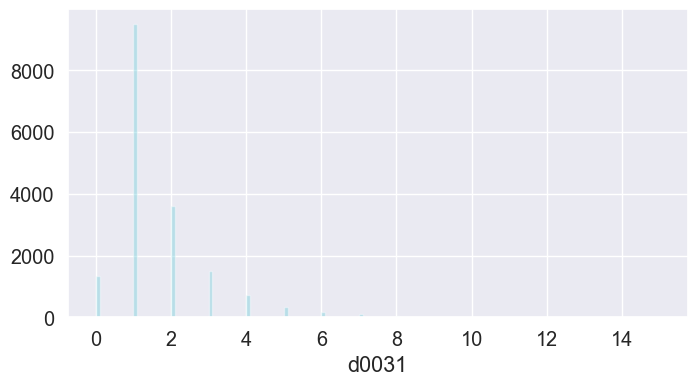

Valores únicos: count    17371.000000
mean         1.634391
std          1.318419
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: d0031, dtype: float64
Número de nulos: 12629
Porcentaje de nulos: 42.1


In [54]:
displot_with_stats(dfindex, 'd0031', "#6dccda" )

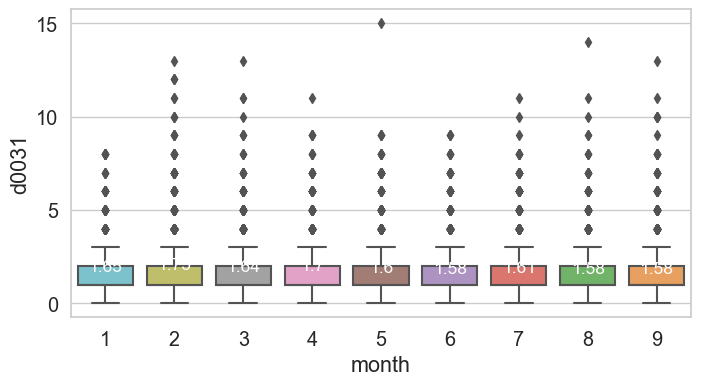

In [55]:
fig, ax = plt.subplots(figsize=(8,4))
sns.set(font_scale=1.5)
box_plot = sns.boxplot(x = 'month', y = 'd0031', data = dfindex, palette=SETCOL1)

medians = round(dfindex.groupby(['month'])['d0031'].mean(),2)
vertical_offset =  round(dfindex['d0031'].median() * 0.05, 2)# offset from median for display


for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians.iloc[xtick] + vertical_offset,medians.iloc[xtick], 
    horizontalalignment = 'center', size = 'x-small', color='w')#, weight = 'semibold')
    

> Observations: 
>
> For this variable and the next ones, the technic select for NaN imputations is different to the variables analyses above. The reaosn is that same technics were applied and the data distribution changes, therefore I decided to applied other techniques that as first approach don't checnde the data distribution.
>
> The technic that works better after several test was the Imputing using ffill, replace NaN s with last observed value. This technic is very used on time series problems, but I decided to implemented here due to the bounded relation btw variables.

In [57]:
dfindex['d0031'][75:85]

kdate
2017-03-25    1.0
2017-02-02    2.0
2017-06-22    1.0
2017-09-18    NaN
2017-07-09    NaN
2017-08-26    2.0
2017-03-25    NaN
2017-04-27    NaN
2017-03-23    NaN
2017-05-15    1.0
Name: d0031, dtype: float64

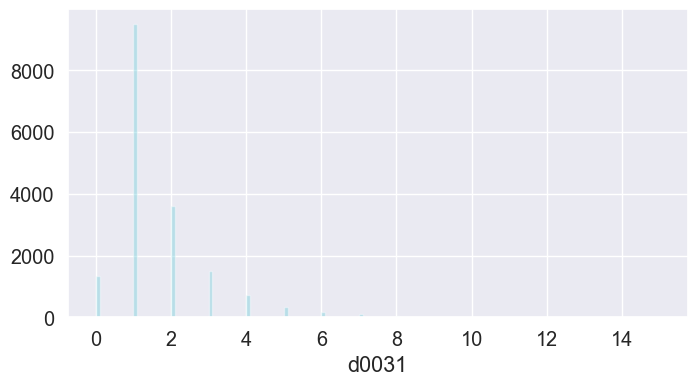

Valores únicos: count    17371.000000
mean         1.634391
std          1.318419
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         15.000000
Name: d0031, dtype: float64
Número de nulos: 12629
Porcentaje de nulos: 42.1


In [58]:
displot_with_stats(dfindex, 'd0031', "#6dccda" )

####  <span style="color:#67bf5c"> Variable: Customer Age - c9008 <a name="id3"></a>

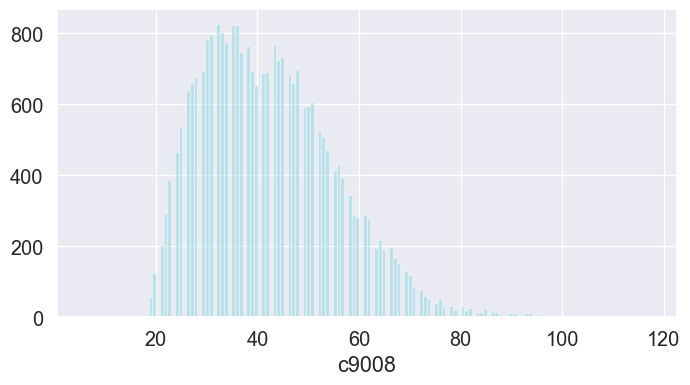

Valores únicos: count    27016.000000
mean        42.339466
std         13.215883
min          6.000000
25%         32.000000
50%         41.000000
75%         51.000000
max        117.000000
Name: c9008, dtype: float64
Número de nulos: 2984
Porcentaje de nulos: 9.95


In [59]:
displot_with_stats(dfindex, 'c9008', "#6dccda" )

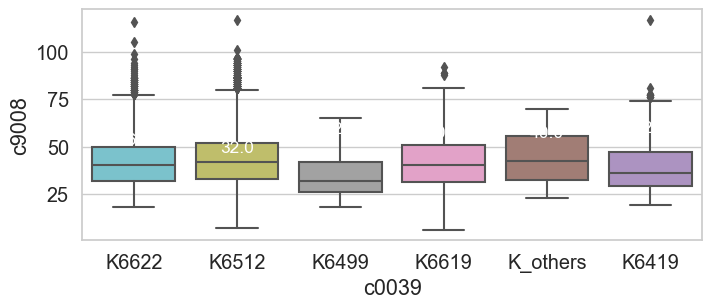

In [60]:
fig, ax = plt.subplots(figsize=(8,3))
sns.set(font_scale=1.5)
box_plot = sns.boxplot(x = 'c0039', y = 'c9008', data = dfindex, palette=SETCOL1)

medians = round(dfindex.groupby(['c0039'])['c9008'].median(),2)
vertical_offset =  round(dfindex['c0001'].median() * 0.05, 2)# offset from median for display


for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians.iloc[xtick] + vertical_offset,medians.iloc[xtick], 
    horizontalalignment = 'center', size = 'x-small', color='w')#, weight = 'semibold')
    

In [61]:
dfindex['c9008'].isnull().sum()

2984

In [62]:
dfindex['c9008'][701:714]

kdate
2017-09-18     NaN
2017-07-27    43.0
2017-05-05    28.0
2017-09-18    30.0
2017-03-27    31.0
2017-05-25    30.0
2017-02-10    47.0
2017-09-01    37.0
2017-03-25    33.0
2017-05-21    21.0
2017-05-22    44.0
2017-03-25    50.0
2017-07-31     NaN
Name: c9008, dtype: float64

In [63]:
def impute_c9008_by_c0039(cols):
    c9008 = cols[0]
    c0039 = cols[1]

    if pandas.isnull(c9008):
        if c0039 == 'K6622':
            return round(df_c[df_c['c0039'] == 'K6622']['c9008'].mean(),2)
        elif c0039 == 'K6512':
            return round(df_c[df_c['c0039'] == 'K6512']['c9008'].mean(),2)
        elif c0039 == 'K6499':
            return round(df_c[df_c['c0039'] == 'K6499']['c9008'].mean(),2)
        elif c0039 == 'K6619':
            return round(df_c[df_c['c0039'] == 'K6619']['c9008'].mean(),2)
        elif c0039 == 'K6419':
            return round(df_c[df_c['c0039'] == 'K6419']['c9008'].mean(),2)
        elif c0039 == 'K_others':
            return round(df_c[df_c['c0039'] == 'K_others']['c9008'].mean(),2)
    else:
        return c9008

In [64]:
dfindex['c9008'] = dfindex[['c9008','c0039']].apply(impute_c9008_by_c0039,axis=1)
dfindex['c9008'].isnull().sum()

0

####  <span style="color:#ff9e4a"> Variable: Amount Of Customer Payments On All Cases B level - b0007 <a name="id3"></a>

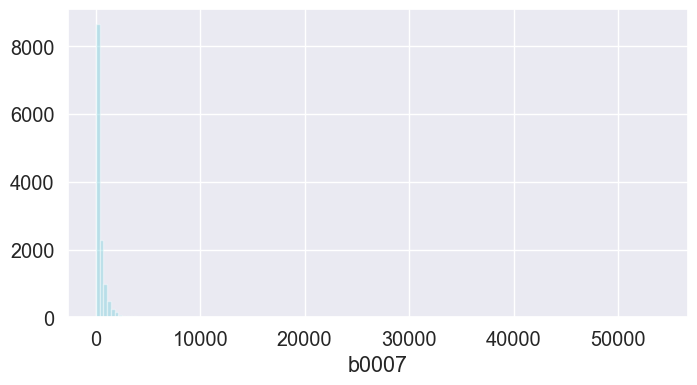

Valores únicos: count    13074.000000
mean       423.156043
std        902.166491
min          0.000000
25%         76.000000
50%        202.715000
75%        500.677500
max      53982.610000
Name: b0007, dtype: float64
Número de nulos: 16926
Porcentaje de nulos: 56.42


In [65]:
displot_with_stats(dfindex, 'b0007', "#6dccda" )

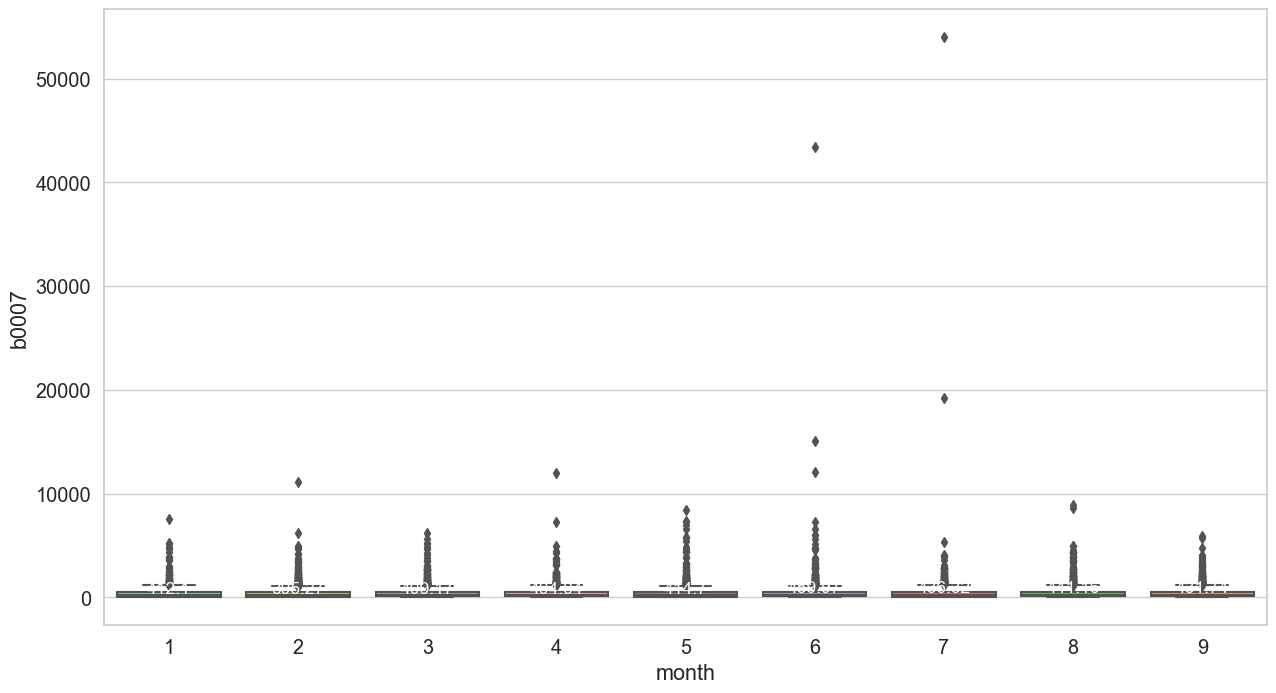

In [66]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.5)
box_plot = sns.boxplot(x = 'month', y = 'b0007', data = dfindex, palette=SETCOL1)

medians = round(dfindex.groupby(['month'])['b0007'].mean(),2)
vertical_offset =  round(dfindex['b0007'].median() * 0.05, 2)# offset from median for display


for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians.iloc[xtick] + vertical_offset,medians.iloc[xtick], 
    horizontalalignment = 'center', size = 'x-small', color='w')#, weight = 'semibold')
    

In [67]:
print(dfindex['b0007'].quantile(0.10))
print(dfindex['b0007'].quantile(0.90))

26.553
1000.5210000000001


In [68]:
#df_c['b0007'] = numpy.where(df_c['b0007'] <2960.0, 2960.0,df['Income'])
dfindex['b0007']  = numpy.where(dfindex['b0007'] >1001, 1000.52,dfindex['b0007'])
print(dfindex['b0007'].skew())

1.0041951972950753


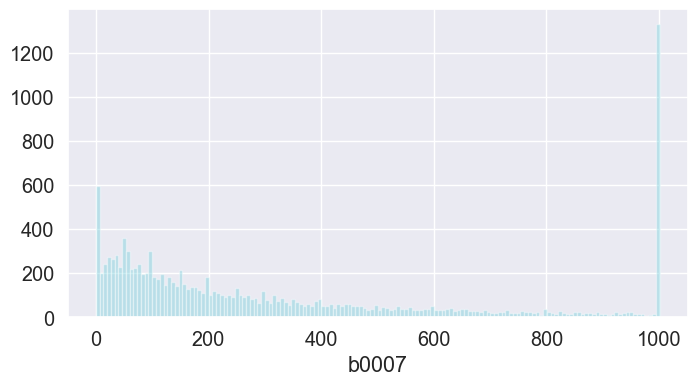

Valores únicos: count    13074.000000
mean       329.420278
std        320.626983
min          0.000000
25%         76.000000
50%        202.715000
75%        500.677500
max       1000.700000
Name: b0007, dtype: float64
Número de nulos: 16926
Porcentaje de nulos: 56.42


In [69]:
displot_with_stats(dfindex, 'b0007', "#6dccda" )

In [70]:
dfindex['b0007'][75:85]

kdate
2017-03-25       NaN
2017-02-02     20.97
2017-06-22    291.95
2017-09-18       NaN
2017-07-09       NaN
2017-08-26       NaN
2017-03-25    116.33
2017-04-27       NaN
2017-03-23     40.40
2017-05-15    158.48
Name: b0007, dtype: float64

In [71]:
dfindex['b0007'].fillna(method='bfill',inplace=True)

In [72]:
dfindex['b0007'][75:85]

kdate
2017-03-25     20.97
2017-02-02     20.97
2017-06-22    291.95
2017-09-18    116.33
2017-07-09    116.33
2017-08-26    116.33
2017-03-25    116.33
2017-04-27     40.40
2017-03-23     40.40
2017-05-15    158.48
Name: b0007, dtype: float64

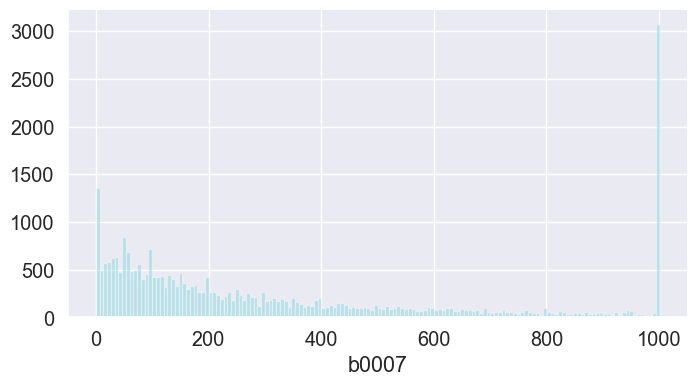

Valores únicos: count    30000.000000
mean       331.513208
std        321.329849
min          0.000000
25%         76.995000
50%        204.410000
75%        509.130000
max       1000.700000
Name: b0007, dtype: float64
Número de nulos: 0
Porcentaje de nulos: 0.0


In [73]:
displot_with_stats(dfindex, 'b0007', "#6dccda" )

####  <span style="color:#ff9e4a"> Variable: Number Of Customer Payments In Last 12 Months - d2112 <a name="id3"></a>

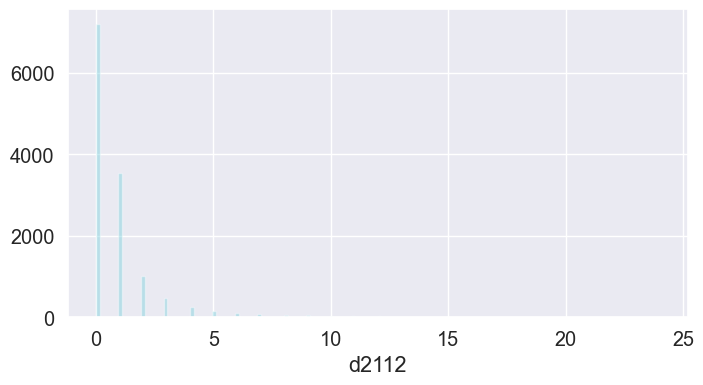

Valores únicos: count    13048.000000
mean         0.935622
std          1.755761
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         24.000000
Name: d2112, dtype: float64
Número de nulos: 16952
Porcentaje de nulos: 56.51


In [74]:
displot_with_stats(dfindex, 'd2112', "#6dccda" )

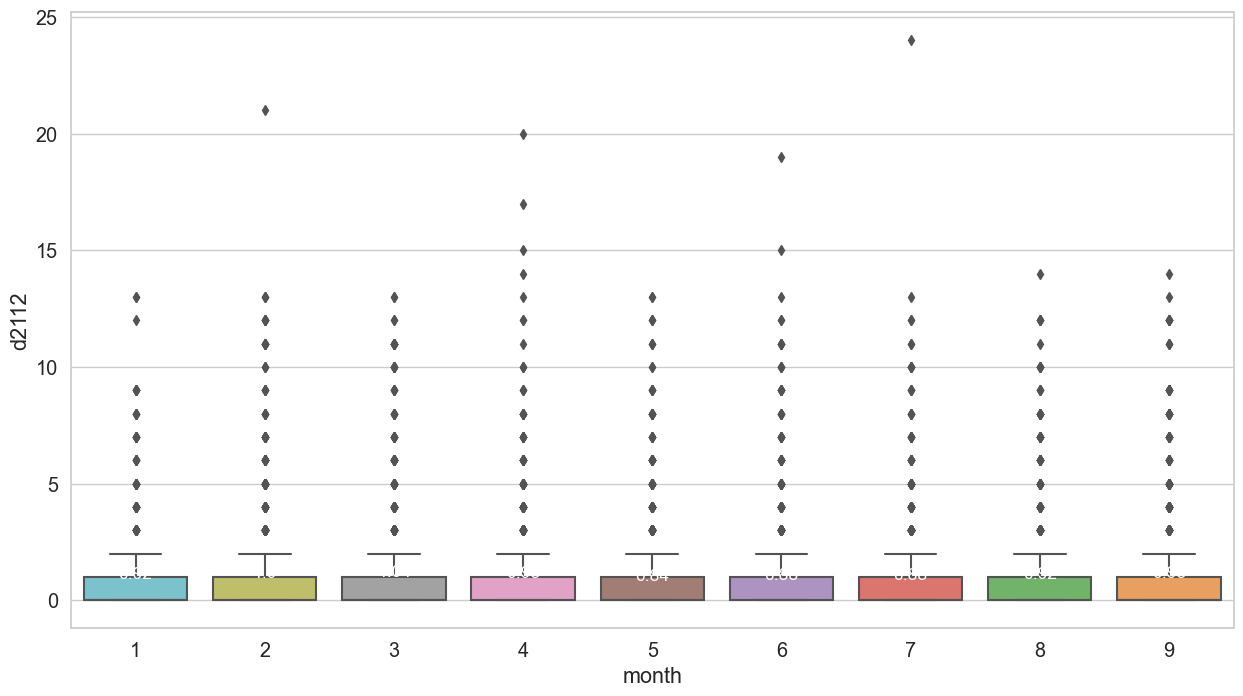

In [75]:
fig, ax = plt.subplots(figsize=(15,8))
sns.set(font_scale=1.5)
box_plot = sns.boxplot(x = 'month', y = 'd2112', data = dfindex, palette=SETCOL1)

medians = round(dfindex.groupby(['month'])['d2112'].mean(),2)
vertical_offset =  round(dfindex['d2112'].median() * 0.05, 2)# offset from median for display


for xtick in box_plot.get_xticks():
    box_plot.text(xtick, medians.iloc[xtick] + vertical_offset,medians.iloc[xtick], 
    horizontalalignment = 'center', size = 'x-small', color='w')#, weight = 'semibold')
    

In [76]:
dfindex['d2112'][75:85]

kdate
2017-03-25    NaN
2017-02-02    0.0
2017-06-22    0.0
2017-09-18    NaN
2017-07-09    NaN
2017-08-26    NaN
2017-03-25    1.0
2017-04-27    NaN
2017-03-23    0.0
2017-05-15    0.0
Name: d2112, dtype: float64

In [77]:
dfindex['d2112'].fillna(method='bfill',inplace=True)

In [78]:
dfindex['d2112'][75:85]

kdate
2017-03-25    0.0
2017-02-02    0.0
2017-06-22    0.0
2017-09-18    1.0
2017-07-09    1.0
2017-08-26    1.0
2017-03-25    1.0
2017-04-27    0.0
2017-03-23    0.0
2017-05-15    0.0
Name: d2112, dtype: float64

####  <span style="color:#67bf5c"> Selecting variables for data analysis <a name="id3"></a>

> The strategy: 
>
> At this point, I going to check how the variables selected so far are correlated with the target variable.
> Any variable that has a high corr with another variable or with target will be drop for the dataset input or modeling. 

In [79]:
all_var_metadf

['case_id',
 'keydate',
 'ct090',
 'ap090',
 'c0001',
 'c0039',
 'c0044',
 'd0031',
 'b0007',
 'd0009',
 'c0031',
 'a8404',
 'c0019',
 'd0027',
 'c9008',
 'd2112',
 'd0012',
 'd1205',
 'c0015',
 'kdate_ori',
 'kdate',
 'month']

In [80]:
df = dfindex.copy()

In [81]:
df.drop(['case_id','kdate_ori','keydate'], axis=1, inplace = True)


In [82]:
df.isnull().sum()

ct090        0
ap090        0
c0001        0
c0039        0
c0044        0
d0031    12629
b0007        0
d0009        0
c0031        0
a8404        0
c0019        0
d0027        0
c9008        0
d2112        0
d0012        0
c0015        0
month        0
dtype: int64

In [83]:
# Correlation btw variables

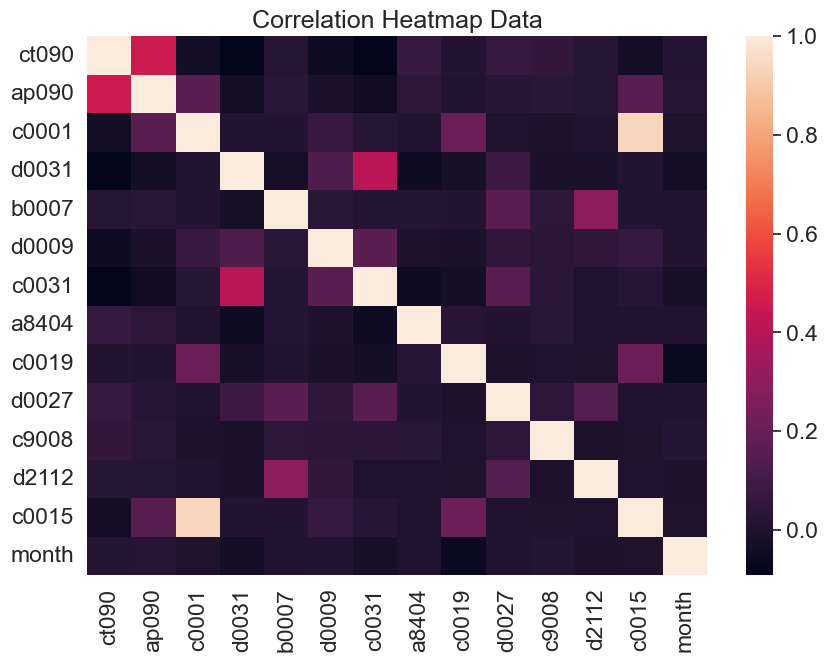

In [84]:
fig = plt.figure(figsize=(10,7))

sns.heatmap(df.corr())

plt.title("Correlation Heatmap Data")
plt.show()

In [85]:
#expt = df_clean.set_experiment("Correlated features")

# corr matrix
cor = df.corr()
cor.loc[:,:] = numpy.tril(cor, k=-1) # below main lower triangle of an array
cor_stack = cor.stack()
print("Columns with corr. greater than 0.75 - ")
print(cor_stack[(cor_stack > 0.75) | (cor_stack < -0.75)])

Columns with corr. greater than 0.75 - 
c0015  c0001    0.939593
dtype: float64


In [86]:
df_c['ct090'].unique

<bound method Series.unique of 0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
29995    0.0
29996    1.0
29997    0.0
29998    0.0
29999    0.0
Name: ct090, Length: 30000, dtype: float64>

In [87]:
df.drop(['c0001'], axis=1, inplace = True)

In [88]:
all_var_metadf, obj_var_metadf, num_var_metadf  = columns_as_list(df)

----------------------------------------------------------------
List of all variables: 

['ct090', 'ap090', 'c0039', 'c0044', 'd0031', 'b0007', 'd0009', 'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'd0012', 'c0015', 'month']
----------------------------------------------------------------
List of object variabless: 

['c0039', 'c0044', 'd0012']
----------------------------------------------------------------
List of numeric variable: 

['ct090', 'ap090', 'd0031', 'b0007', 'd0009', 'c0031', 'a8404', 'c0019', 'd0027', 'c9008', 'd2112', 'c0015', 'month']


In [89]:
datasetdf[datasetdf['varcode'].isin(all_var_metadf)]

varcode                                               name var_class  \
0    a8404  RatioOfCustomersAtAddressWithSuccessfullyClose...  variable   
1    ap090                                 TargetAmount90Days    target   
3    c0015                                       AmountOfCase  variable   
4    c0019                                          AgeOfDebt  variable   
5    c0031                               NumberOfTelephonesCI  variable   
6    c0039                                       IndustryCode  variable   
7    c0044                                         ClientName  variable   
8    c9008                                        CustomerAge  variable   
9    ct090                                       Target90Days    target   
10   b0007           AmountOfCustomerPaymentsOnAllCasesBlevel  variable   
11   d0009                          AmountOfCustomerOpenCases  variable   
12   d0012                  LastOriginalClosingCodeOfCustomer  variable   
13   d0027               NumberOfCustomerIncomingCallDatesTee  variable   
15   d2112             NumberOfCustomerPaymentsInLast12Months  variable   
16   d0031  NumberOfUnsuccessfullyClosedCustomerCasesLast3...  variable   

   entity_table  
0       address  
1          case  
3          case  
4          case  
5          case  
6          case  
7          case  
8          case  
9          case  
10       debtor  
11    debtor_oc  
12    debtor_oc  
13    debtor_oc  
15    debtor_oc  
16    debtor_oc

### Helper functions: Finding relationship between variables - Bivariant Analysis


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #1: ct090



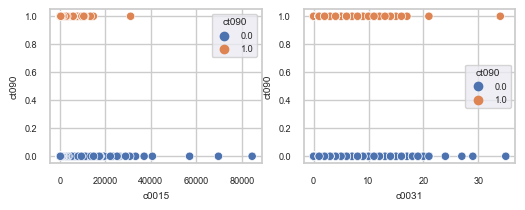


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #2: ap090



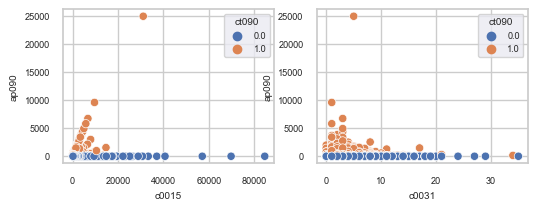


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #3: c0039



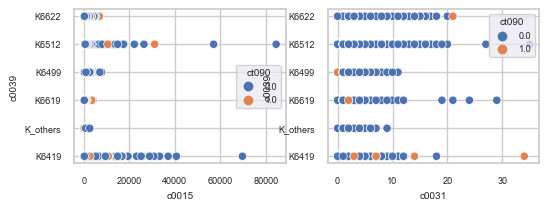


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #4: c0044



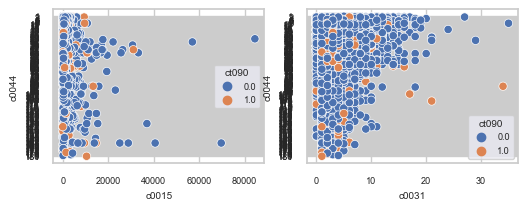


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #5: d0031



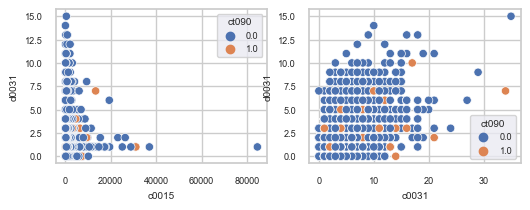


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #6: b0007



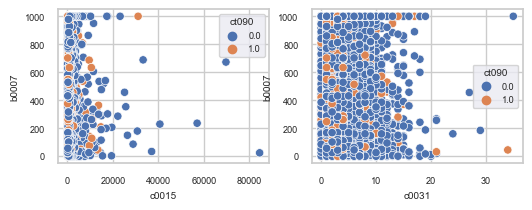


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #7: d0009



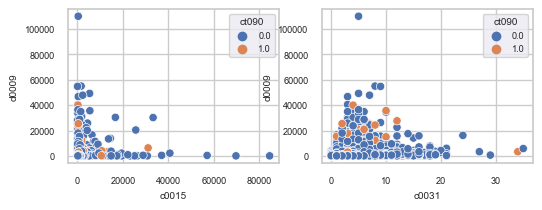


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #8: c0031



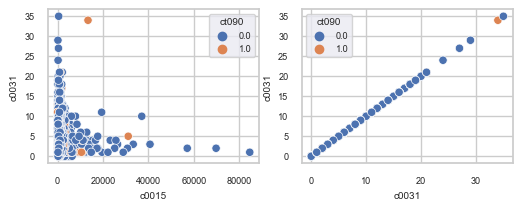


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #9: a8404



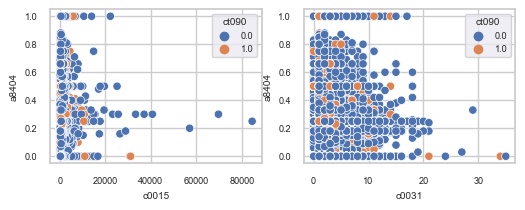


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #10: c0019



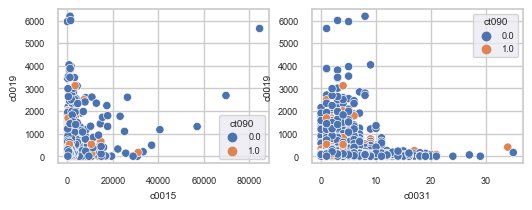


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #11: d0027



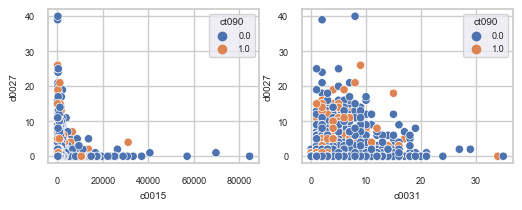


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #12: c9008



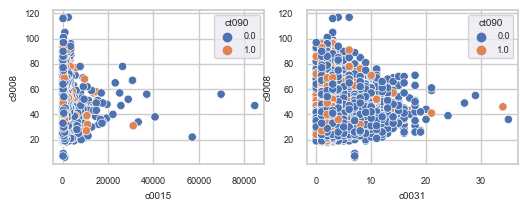


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #13: d2112



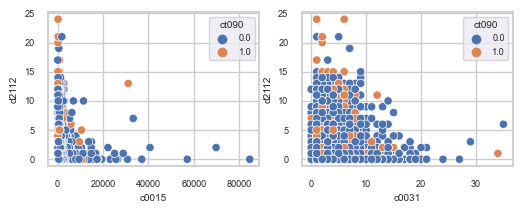


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #14: d0012



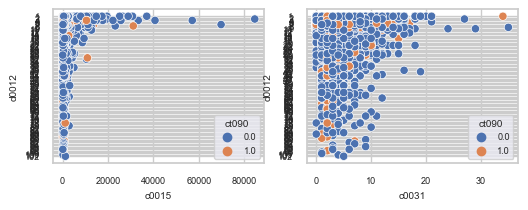


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #15: c0015



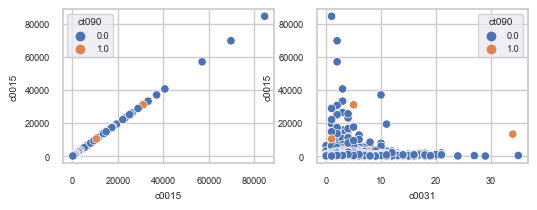


----------------------------------------------------------------
Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase
var #16: month



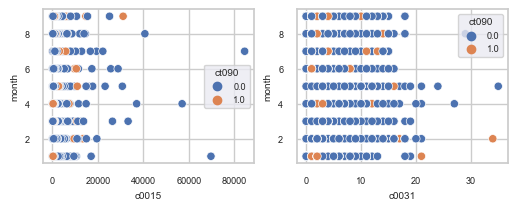

In [112]:
for i, col in enumerate(all_var_metadf):
    sns.set_style('whitegrid')
    sns.set_palette(SETCOL1)
    print("\n----------------------------------------------------------------")
    print("Analysis on the variable c0015: AmountOfCase and c0015: AmountofCase")
    print(f"var #{i+1}: {col}\n")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 2])
    sns.set(font_scale=0.6)
    sns.scatterplot(x=df['c0015'], y=df[col], ax=ax1, hue = df['ct090'] )
    sns.scatterplot(x=df['c0031'], y=df[col], ax=ax2, hue = df['ct090'])
    label_font = {'size':'11'}
    plt.show()


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #1: ct090



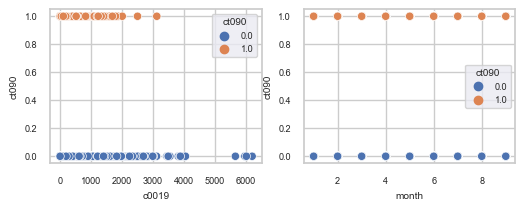


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #2: ap090



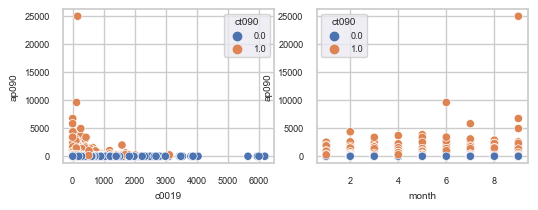


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #3: c0039



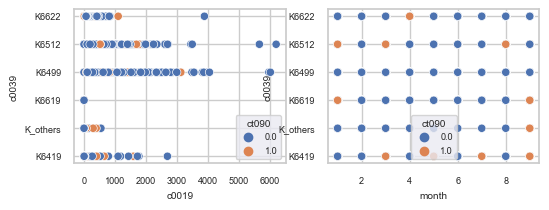


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #4: c0044



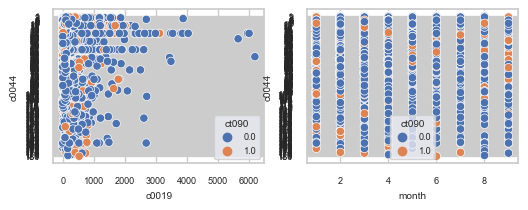


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #5: d0031



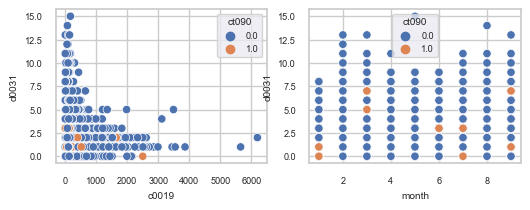


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #6: b0007



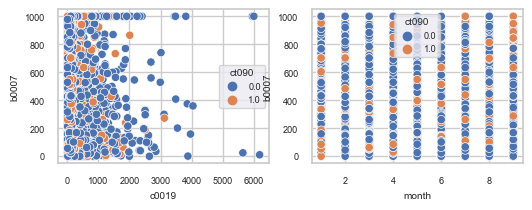


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #7: d0009



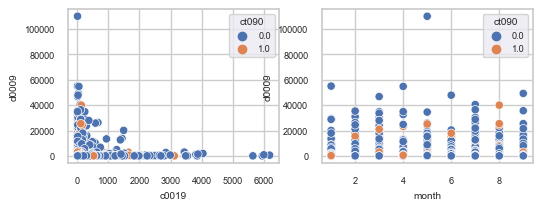


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #8: c0031



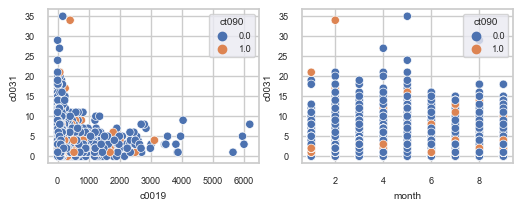


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #9: a8404



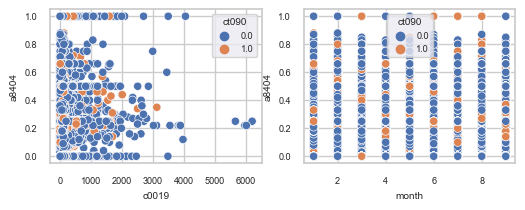


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #10: c0019



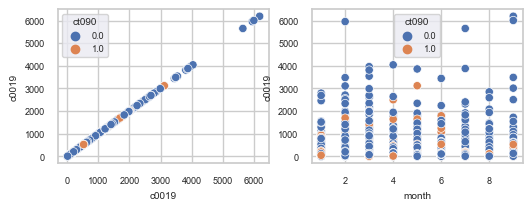


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #11: d0027



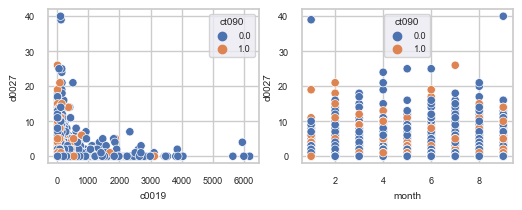


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #12: c9008



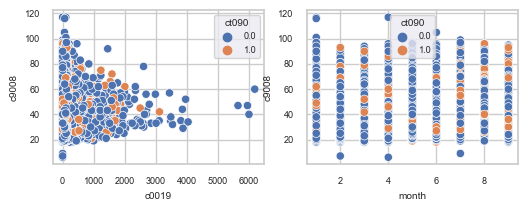


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #13: d2112



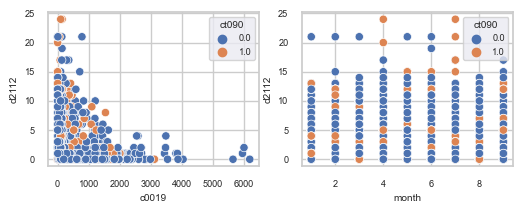


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #14: d0012



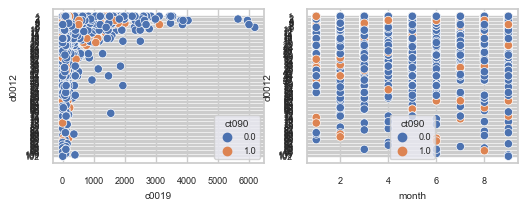


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #15: c0015



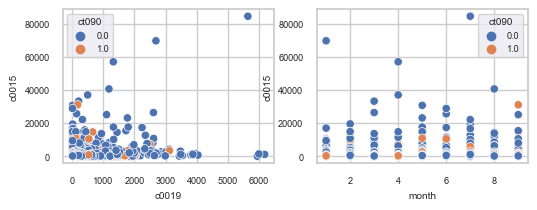


----------------------------------------------------------------
Analysis on the variable c0019: NumberOfTelephonesCalls and month
var #16: month



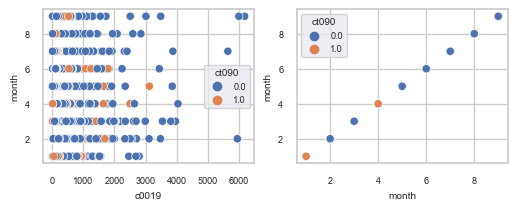

In [114]:
for i, col in enumerate(all_var_metadf):
    sns.set_style('whitegrid')
    sns.set_palette(SETCOL1)
    print("\n----------------------------------------------------------------")
    print("Analysis on the variable c0019: NumberOfTelephonesCalls and month")
    print(f"var #{i+1}: {col}\n")
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[6, 2])
    sns.set(font_scale=0.6)
    sns.scatterplot(x=df['c0019'], y=df[col], ax=ax1, hue = df['ct090'] )
    sns.scatterplot(x=df['month'], y=df[col], ax=ax2, hue = df['ct090'])
    label_font = {'size':'13'}
    plt.show()

> Observations:
> 
> It is clear that the dataset is unbalanced.
>
> There is not a clear relationship btw the analysed variables and in some of them datasample are concentrated on some range.
>
> Regarding the variable month, it can be apreciated that not sample point with target = 1 was displayed. For example, with the variable c0015: Amount of case, the month 2, 3 and 8 shows pretty low or none target variable to 1. Therefore, a hyphotesis can be rise as from the month to the 90 days we have the months 5 (2+3), 6(3+3), 12(8+3) considering as the months less ideal to collect debt, or the the strategies applies are less efficeints. 


### Check correlation between variables and target

<AxesSubplot:>

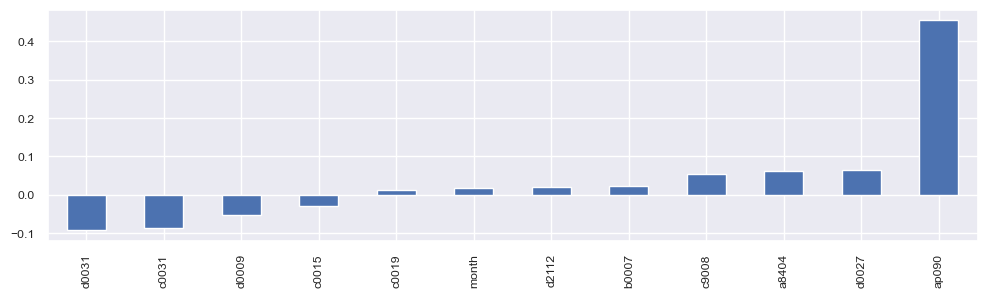

In [97]:
plt.figure(figsize=(12,3))
df.corr()['ct090'].sort_values().drop('ct090').plot(kind='bar')

In [98]:
cor_stack_1 = df.corr()['ct090'].sort_values().drop('ct090')
cor_stack_1

d0031   -0.091434
c0031   -0.085084
d0009   -0.051487
c0015   -0.027784
c0019    0.013104
month    0.017312
d2112    0.021705
b0007    0.022114
c9008    0.054113
a8404    0.063456
d0027    0.064621
ap090    0.455047
Name: ct090, dtype: float64

>Observation:
>
> There is not variable with high correlation against the target, therefore none will be drop under this premise.

#  <span style="color:#E8846F"> Output <a name="id3"></a>

> A dataframe clean is exported after doing some transformation to adapt the data for modeling. This will set on ...data/processed path.

In [100]:
df.head(3)

ct090  ap090  c0039 c0044  d0031   b0007   d0009  c0031  a8404  \
kdate                                                                        
2017-08-12    0.0    0.0  K6622     1    2.0    0.00  238.38    2.0   0.18   
2017-02-03    0.0    0.0  K6512     2    NaN  210.53    0.00    5.0   0.25   
2017-02-17    0.0    0.0  K6512     3    1.0   20.00    0.00    2.0   0.00   

            c0019  d0027  c9008  d2112 d0012   c0015  month  
kdate                                                        
2017-08-12   98.0    0.0   49.0    0.0     1  222.69      8  
2017-02-03  109.0    2.0   51.0    0.0     2  212.72      2  
2017-02-17  748.0    0.0   48.0    0.0     3   56.84      2

In [101]:
df_clean = df.copy()

In [102]:
df_clean.reset_index()

kdate  ct090  ap090  c0039 c0044  d0031   b0007     d0009  c0031  \
0     2017-08-12    0.0    0.0  K6622     1    2.0    0.00    238.38    2.0   
1     2017-02-03    0.0    0.0  K6512     2    NaN  210.53      0.00    5.0   
2     2017-02-17    0.0    0.0  K6512     3    1.0   20.00      0.00    2.0   
3     2017-09-18    0.0    0.0  K6622     4    NaN   20.00     54.14    3.0   
4     2017-07-22    0.0    0.0  K6512     5    2.0   20.00     83.00    6.0   
...          ...    ...    ...    ...   ...    ...     ...       ...    ...   
29995 2017-05-22    0.0    0.0  K6512    27    NaN  978.62    242.06    3.0   
29996 2017-08-20    1.0  188.4  K6512    10    NaN  101.90  25408.75    2.0   
29997 2017-06-11    0.0    0.0  K6512     6    1.0  101.90      0.00    3.0   
29998 2017-02-17    0.0    0.0  K6512    11    NaN  101.90      0.00    2.0   
29999 2017-08-10    0.0    0.0  K6419    36    NaN   56.62      0.00    1.0   

       a8404  c0019  d0027  c9008  d2112 d0012   c0015  month  
0       0.18   98.0    0.0   49.0    0.0     1  222.69      8  
1       0.25  109.0    2.0   51.0    0.0     2  212.72      2  
2       0.00  748.0    0.0   48.0    0.0     3   56.84      2  
3       1.00    8.0    0.0   27.0    0.0     4  463.15      9  
4       0.25  324.0    0.0   40.0    0.0     1  146.09      7  
...      ...    ...    ...    ...    ...   ...     ...    ...  
29995   1.00    4.0    0.0   40.0    3.0     7  435.46      5  
29996   0.27  111.0    1.0   40.0    0.0     4  372.48      8  
29997   0.09  103.0    0.0   41.0    0.0     1  516.45      6  
29998   0.25  199.0    0.0   54.0    0.0     6  544.00      2  
29999   0.00    7.0    0.0   33.0    1.0     7  174.65      8  

[30000 rows x 17 columns]

In [103]:
df_clean.to_csv((config_output + "df_clean.csv"))
